## OR - Assignment 1

##### Author: Joaquim Marset Alsina

### Imports

In [1]:
import os
import random
from generator import ImageGenerator, TrainImageGenerator, TrainBalancedImageGenerator
from train import Trainer
from load_utils import *
from segmentation_utils import extract_train_segmentations, sort_objects_to_balance
from model_utils import mobile_name
from other_utils import *

### Constants

In [10]:
root_path = "./"
train_val_path = os.path.join(root_path, 'VOCtrainval_06-Nov-2007', 'VOCdevkit', 'VOC2007')
seg_objects_path = os.path.join(train_val_path, "SegmentationObject")
seg_classes_path = os.path.join(train_val_path, "SegmentationClass")
annotations_path = os.path.join(train_val_path, "Annotations")
images_path = os.path.join(train_val_path, "JPEGImages")

train_split_path = os.path.join(root_path, 'voc_train.txt')
val_split_path = os.path.join(root_path, 'voc_val.txt')

segmentations_pickle_path = os.path.join(root_path, "segmentations.pkl")
train_classes_counts_path = os.path.join(root_path, "train_classes_counts.pkl")

results_path = os.path.join(root_path, 'results')
results_mobile_path = os.path.join(results_path, mobile_name)

models_path = os.path.join(root_path, 'models')
models_mobile_path = os.path.join(models_path, mobile_name)

In [3]:
seed = 1412
image_size = 224
val_percentage = 0.2
prob_augment = 0.5
batch_size = 32
num_epochs = 50
num_classes = get_num_classes()

### Create required folders

In [4]:
if not exists_path(results_path):
    create_results_folder(results_path)
    create_results_folder(results_mobile_path)

In [5]:
if not exists_path(models_path):
    create_results_folder(models_path)
    create_results_folder(models_mobile_path)

### Load train and validation split

In [6]:
train_names, val_names = read_train_val_split(train_split_path, val_split_path)

random.Random(seed).shuffle(train_names)
random.Random(seed).shuffle(val_names)

### Extract segmentation objects

In [7]:
if not exists_path(segmentations_pickle_path):
    train_segmentations = extract_train_segmentations(images_path, seg_objects_path, seg_classes_path, train_names, image_size)
    save_dict_to_pickle(segmentations_pickle_path, train_segmentations)
else:
    train_segmentations = load_pickle_dict(segmentations_pickle_path)

### Experiments

In [6]:
# Unchanged during all experiments
val_generator = ImageGenerator(batch_size, images_path, annotations_path, val_names, image_size, seed)

In [7]:
fine_tune_epochs = 30
total_epochs = num_epochs + fine_tune_epochs

def run_experiment_fine_tune(model_name, results_path, models_path, train_gen, experiment_name, model_file, verbose=0):
    file_name, plot_title = experiment_name
    trainer = Trainer(results_path, models_path, model_name, image_size, num_classes)
    trainer.train_fine_tune(num_epochs, fine_tune_epochs, train_gen, val_generator, file_name, plot_title, model_file, verbose)

#### MobileNetv2 - No augmentation

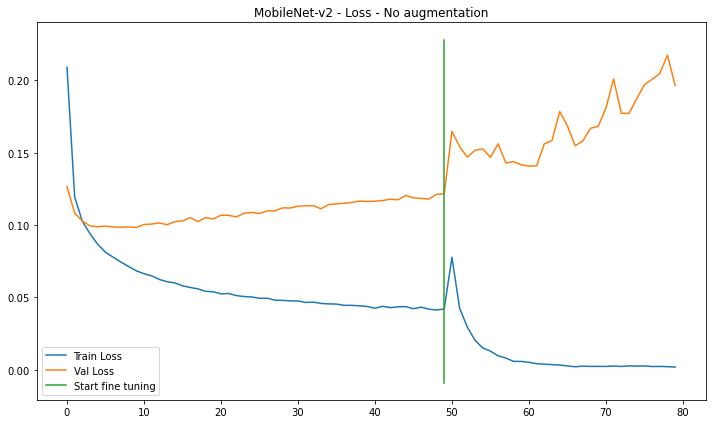

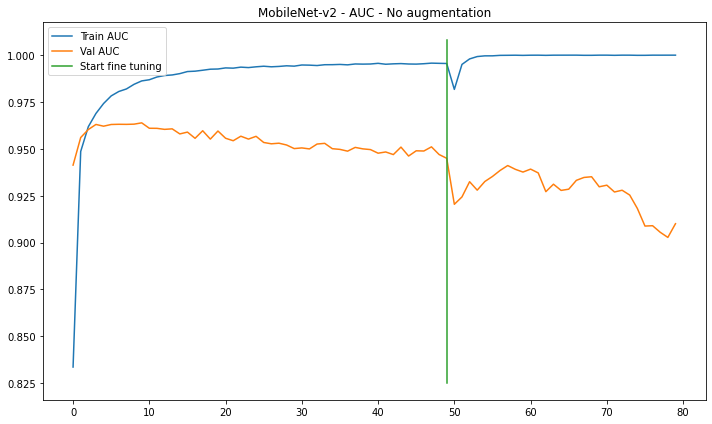

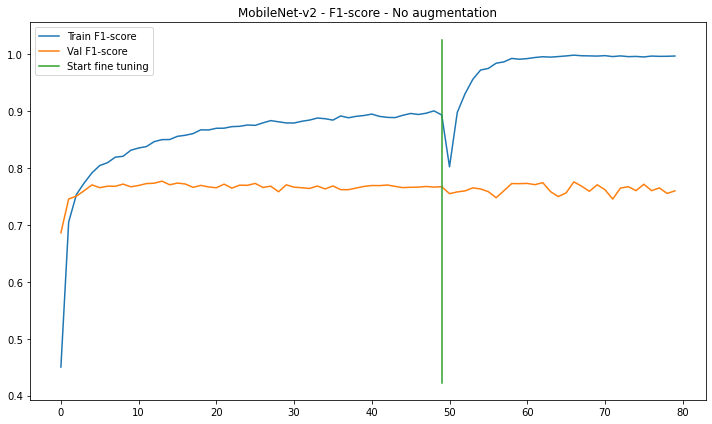

In [10]:
augmentation_mode = AugmentationMode.NoAugmentation

train_generator = ImageGenerator(batch_size, images_path, annotations_path, train_names, image_size, seed)

experiment_name_file = 'no_augmentation'
experiment_name_title = 'No augmentation'
model_file = experiment_name_file

run_experiment_fine_tune(mobile_name, results_mobile_path, models_mobile_path, 
    train_generator, (experiment_name_file, experiment_name_title), model_file)

#### MobileNetv2 - Augmentation without overlap

In [ ]:
augmentation_mode = AugmentationMode.Augmentation

for num_to_place in [1, 3, 5]:

    train_generator = TrainImageGenerator(batch_size, images_path, annotations_path, train_names, 
    image_size, train_segmentations, augmentation_mode, num_to_place, prob_augment, total_epochs, seed)

    experiment_name_file = f'augmentation_{num_to_place}'
    experiment_name_title = f'Augmentation - Placing {num_to_place}'
    model_file = experiment_name_file

    run_experiment_fine_tune(mobile_name, results_mobile_path, models_mobile_path, 
        train_generator, (experiment_name_file, experiment_name_title), model_file)

    print(f'Finished experiment placing {num_to_place} objects')

### MobileNet-v2 - Augmentation without overlap applying random rotations

Average placed during 80 epochs: 0.9962
Finished experiment placing 1 objects
Average placed during 80 epochs: 2.9932
Finished experiment placing 3 objects
Average placed during 80 epochs: 4.9919
Finished experiment placing 5 objects


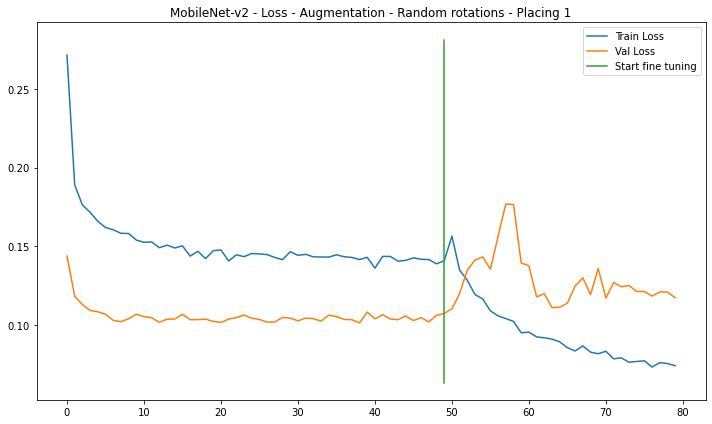

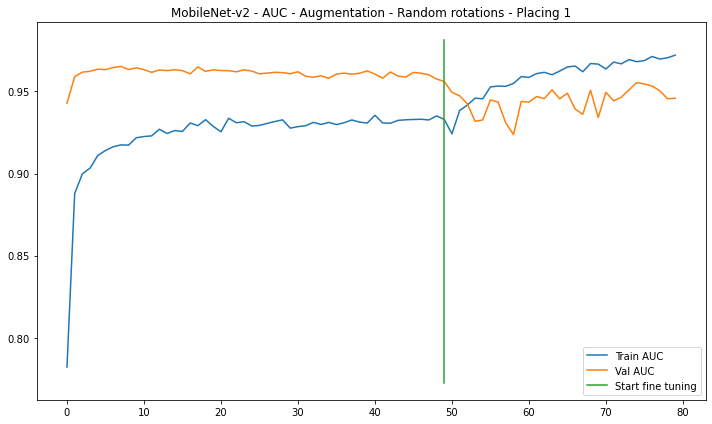

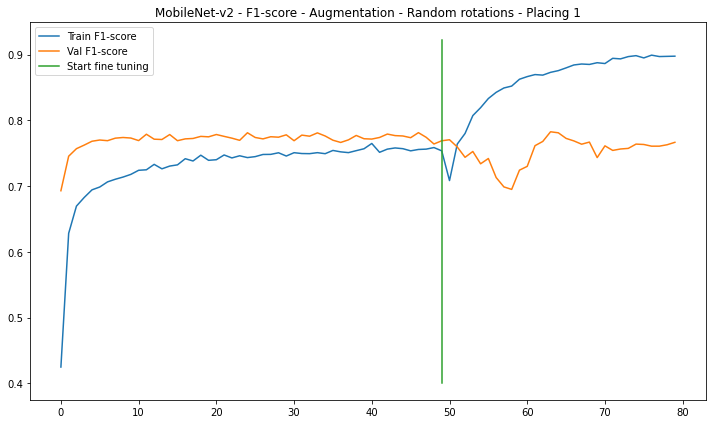

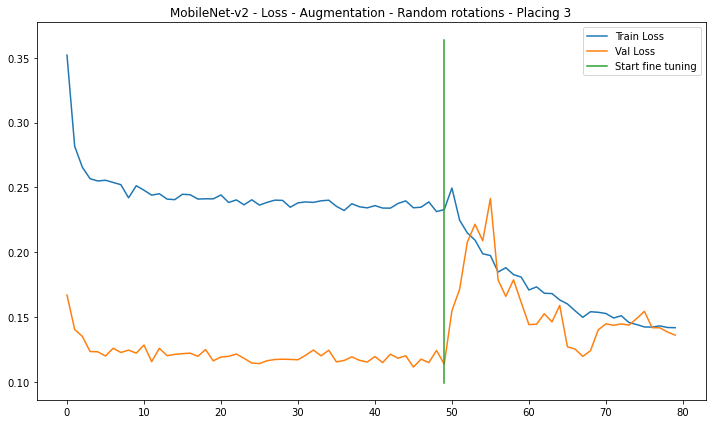

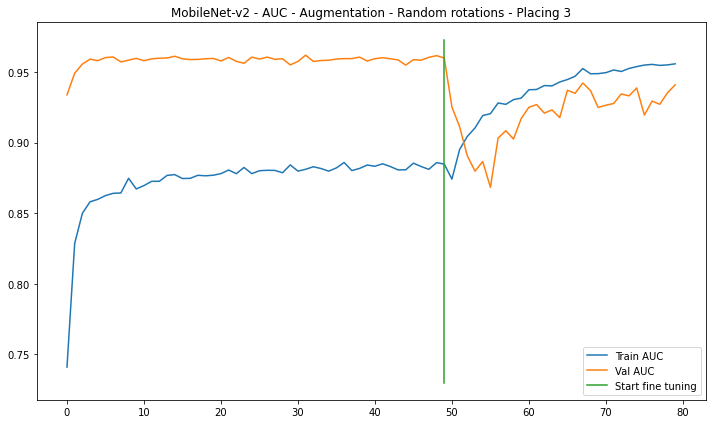

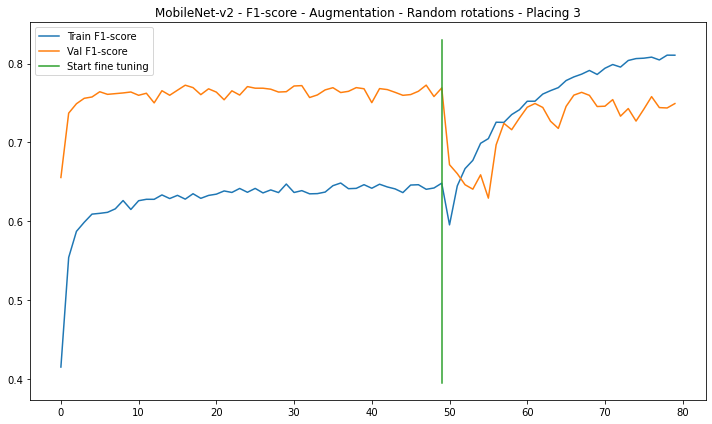

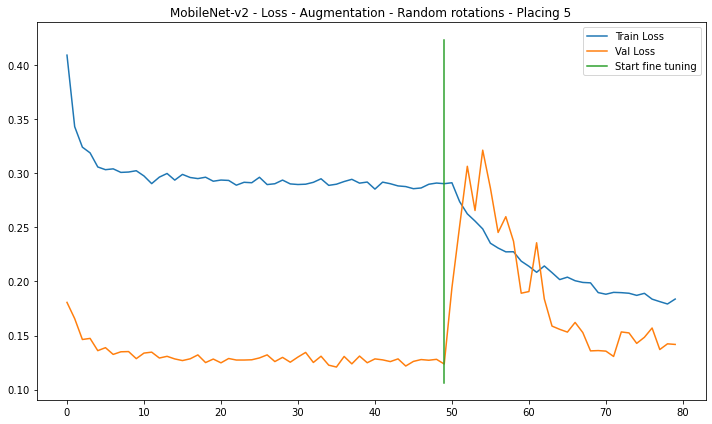

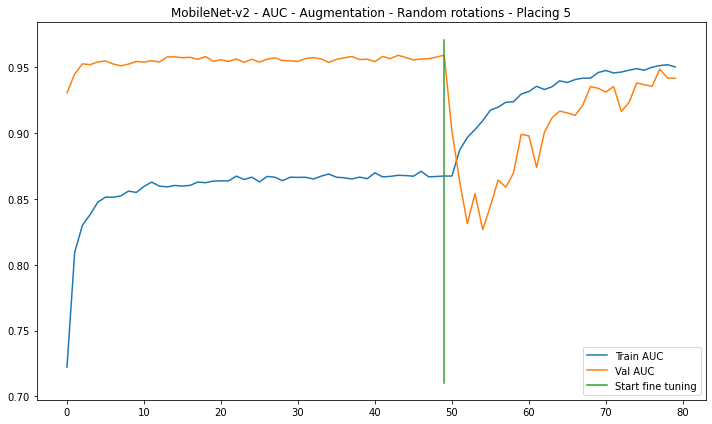

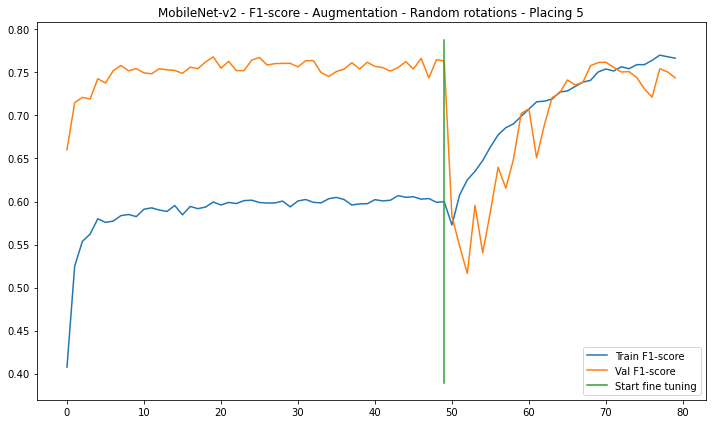

In [8]:
augmentation_mode = AugmentationMode.AugmentationRotate

for num_to_place in [1, 3, 5]:

    train_generator = TrainImageGenerator(batch_size, images_path, annotations_path, train_names, 
        image_size, train_segmentations, augmentation_mode, num_to_place, prob_augment, total_epochs, seed)

    experiment_name_file = f'augmentation_rotate_{num_to_place}'
    experiment_name_title = f'Augmentation - Random rotations - Placing {num_to_place}'
    model_file = experiment_name_file

    run_experiment_fine_tune(mobile_name, results_mobile_path, models_mobile_path, 
        train_generator, (experiment_name_file, experiment_name_title), model_file)

    print(f'Finished experiment placing {num_to_place} objects')

### MobileNet-v2 - Augmentation without overlap applying random scalings

Average placed during 80 epochs: 0.9973
Finished experiment placing 1 objects
Average placed during 80 epochs: 2.9989
Finished experiment placing 3 objects
Average placed during 80 epochs: 4.9996
Finished experiment placing 5 objects


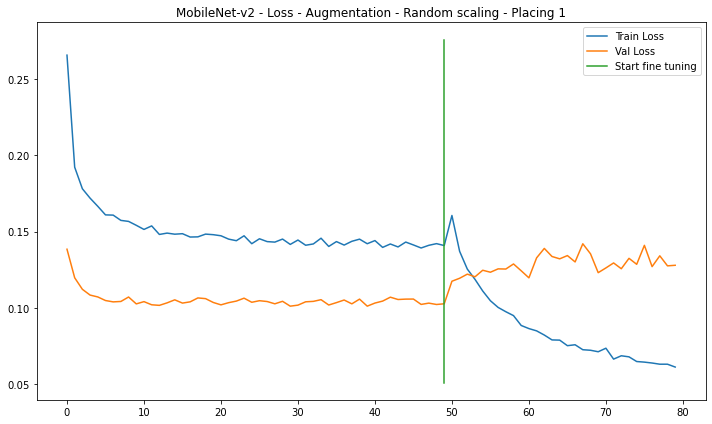

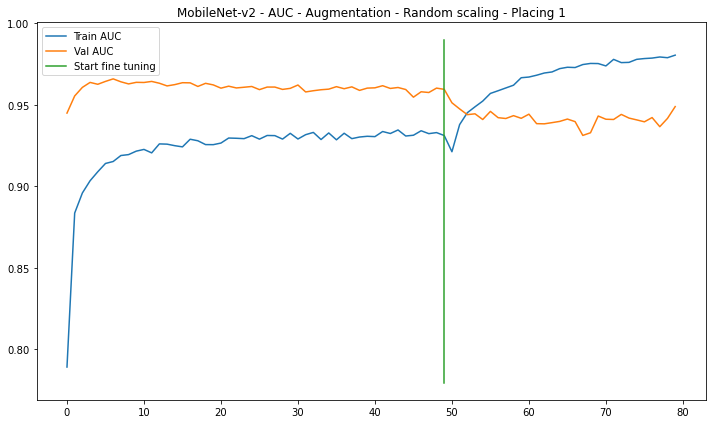

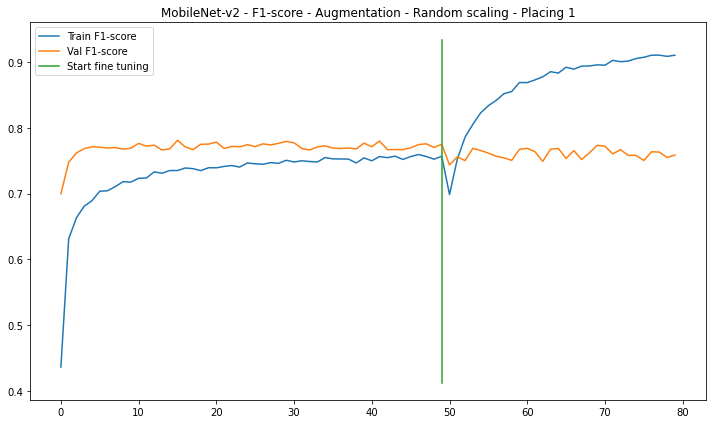

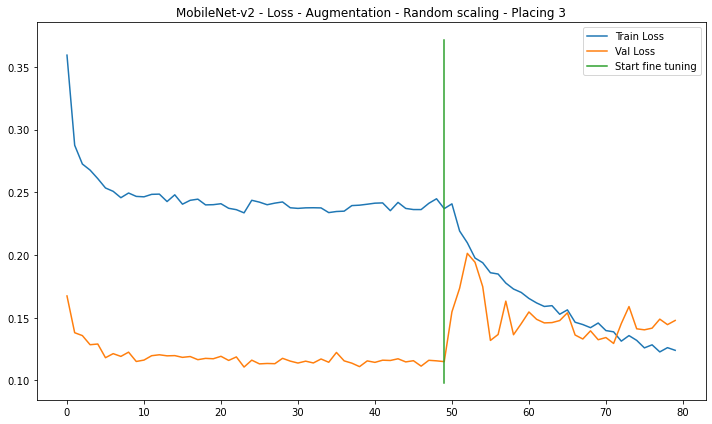

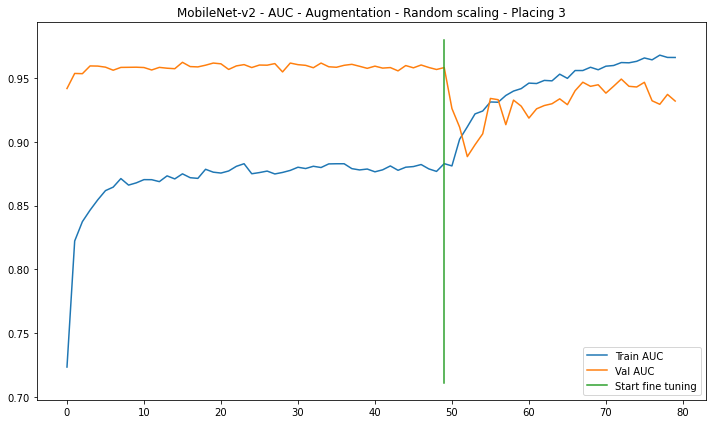

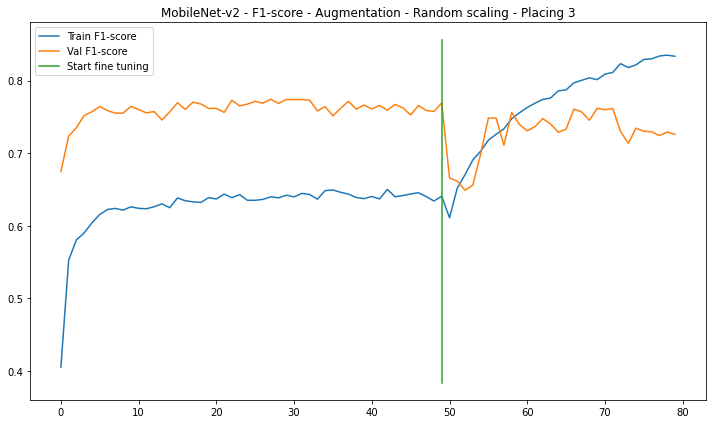

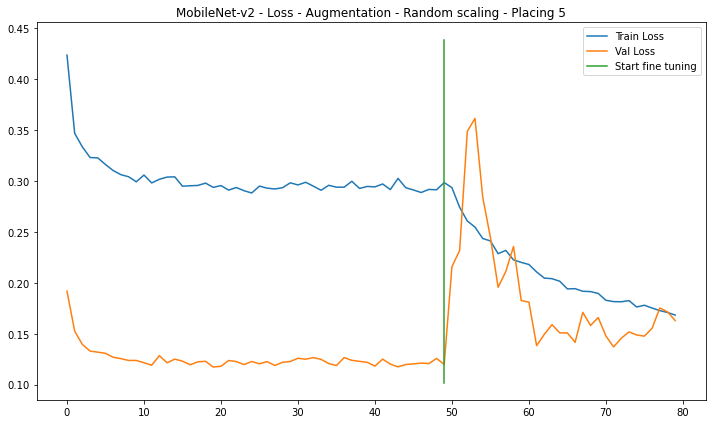

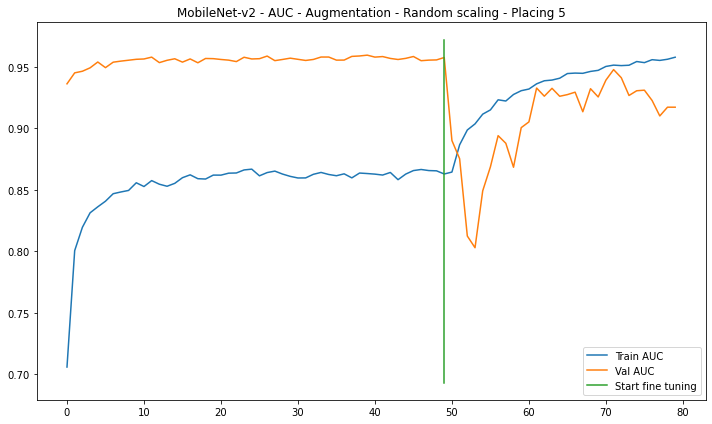

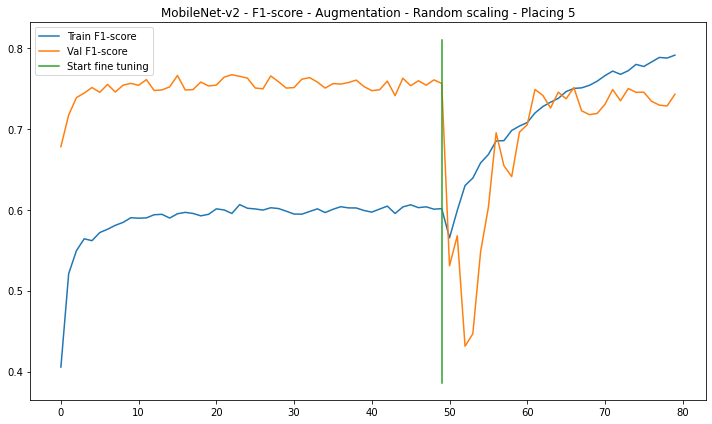

In [9]:
augmentation_mode = AugmentationMode.AugmentationScale

for num_to_place in [1, 3, 5]:

    train_generator = TrainImageGenerator(batch_size, images_path, annotations_path, train_names, 
        image_size, train_segmentations, augmentation_mode, num_to_place, prob_augment, total_epochs, seed)

    experiment_name_file = f'augmentation_scale_{num_to_place}'
    experiment_name_title = f'Augmentation - Random scaling - Placing {num_to_place}'
    model_file = experiment_name_file

    run_experiment_fine_tune(mobile_name, results_mobile_path, models_mobile_path, 
        train_generator, (experiment_name_file, experiment_name_title), model_file)

    print(f'Finished experiment placing {num_to_place} objects')

#### MobileNetv2 - Augmentation without overlap applying random transformations

Average placed during 80 epochs: 0.9985
Finished experiment placing 1 objects
Average placed during 80 epochs: 2.9997
Finished experiment placing 3 objects
Average placed during 80 epochs: 5.0000
Finished experiment placing 5 objects


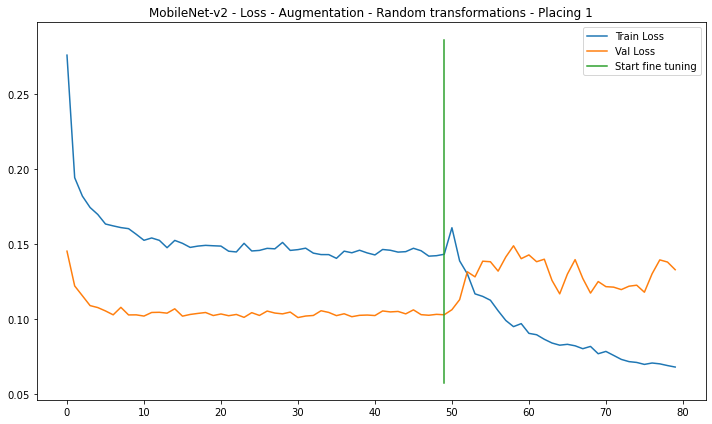

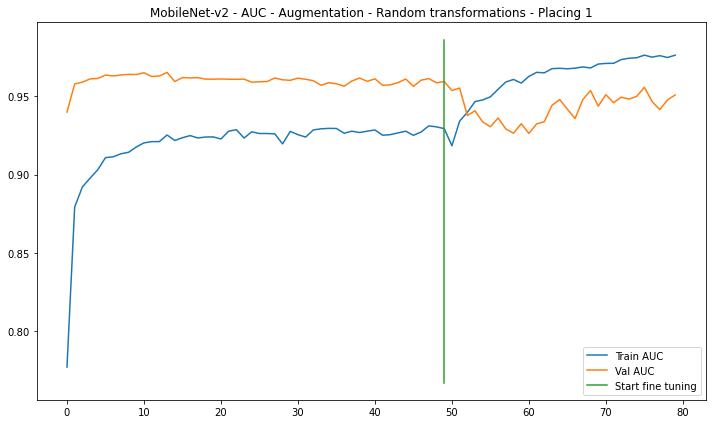

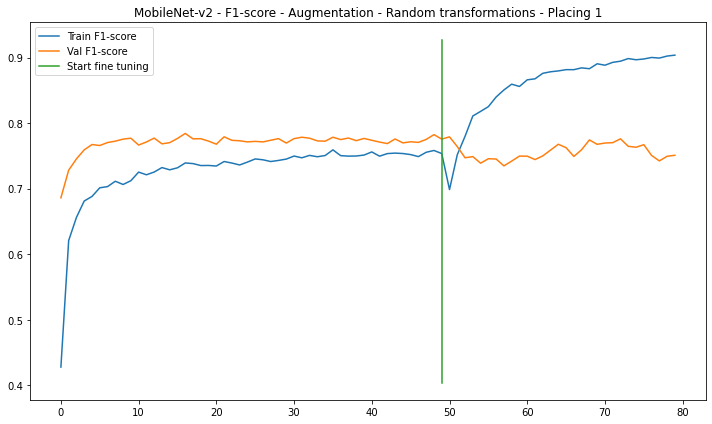

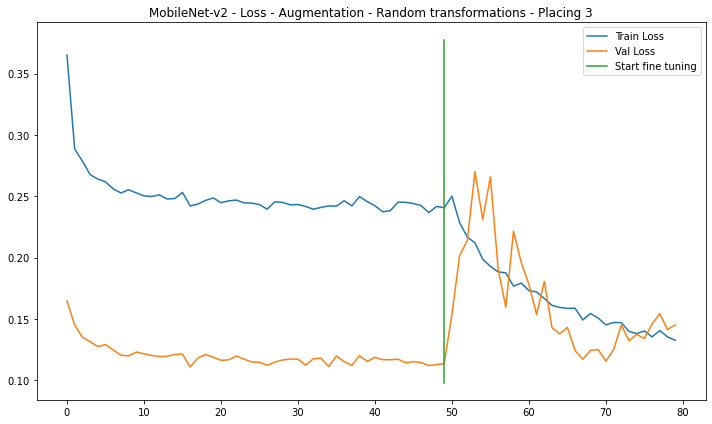

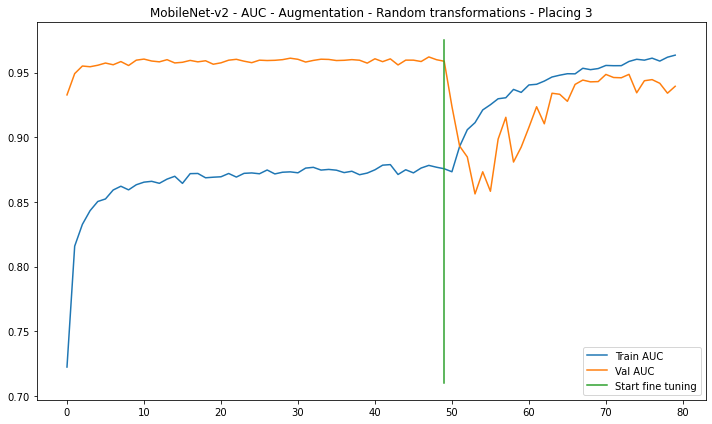

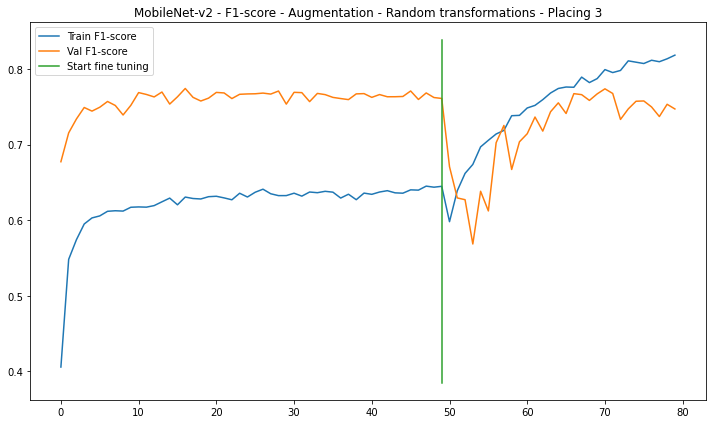

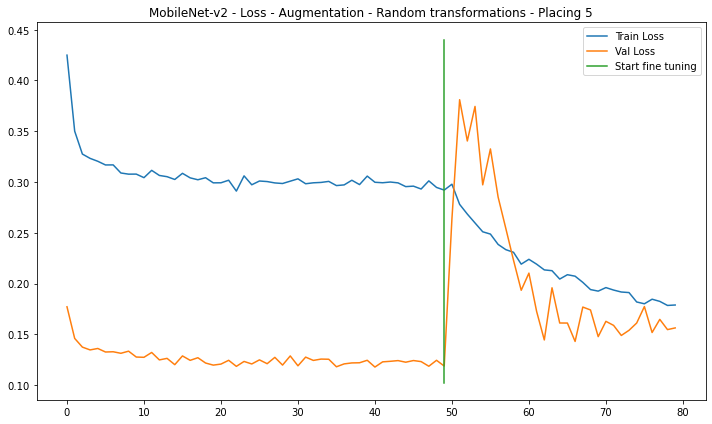

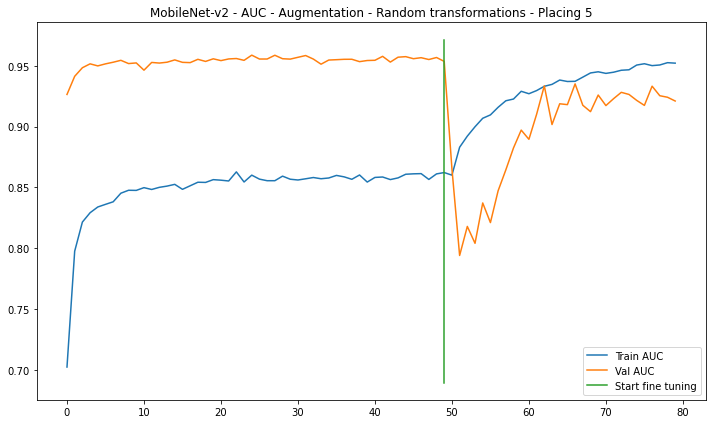

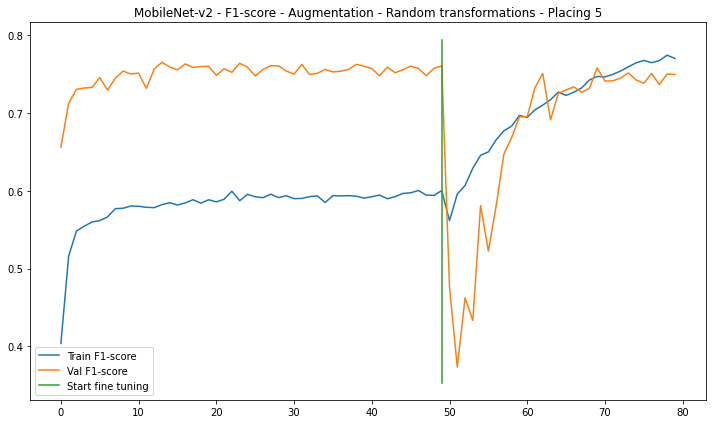

In [10]:
augmentation_mode = AugmentationMode.AugmentationTransform

for num_to_place in [1, 3, 5]:

    train_generator = TrainImageGenerator(batch_size, images_path, annotations_path, train_names, 
        image_size, train_segmentations, augmentation_mode, num_to_place, prob_augment, total_epochs, seed)

    experiment_name_file = f'augmentation_transform_{num_to_place}'
    experiment_name_title = f'Augmentation - Random transformations - Placing {num_to_place}'
    model_file = experiment_name_file

    run_experiment_fine_tune(mobile_name, results_mobile_path, models_mobile_path, 
        train_generator, (experiment_name_file, experiment_name_title), model_file)

    print(f'Finished experiment placing {num_to_place} objects')

#### MobileNetv2 - Augmentation without overlap keeping the same class proportion

In [12]:
if not exists_path(train_classes_counts_path):
    train_classes_counts = extract_train_classes_counts(annotations_path, train_names)
    save_dict_to_pickle(train_classes_counts_path, train_classes_counts)
else:
    train_classes_counts = load_pickle_dict(train_classes_counts_path)

Average placed during 80 epochs: 2.9310
Average class objects during 80 epochs: [1053.55   1053.15   1053.0625 1053.325  1053.2875 1035.875  1282.3375
  885.3375 1127.225  1053.4375  954.2    1053.0125 1053.2875  999.175
 4207.5    1053.05   1053.35   1053.4375  985.     1053.325 ]
Finished experiment balancing up to 1/4 of person objects
Average placed during 80 epochs: 4.6423
Average class objects during 80 epochs: [1404.475  1404.3375 1404.5375 1404.4125 1403.8625 1404.55   1402.1875
 1404.425  1402.75   1404.2375 1404.4625 1404.2875 1404.225  1403.9875
 4205.675  1404.0375 1404.325  1404.2    1404.625  1404.4375]
Finished experiment balancing up to 1/3 of person objects
Average placed during 80 epochs: 7.7829
Average class objects during 80 epochs: [2107.475  2107.4625 2107.075  2107.525  2106.6875 2107.5625 2105.15
 1672.925  2105.725  2107.425  1939.8875 2107.3625 2107.2625 2051.7875
 4207.5    2107.5125 2107.55   2107.35   2045.5625 2107.3   ]
Finished experiment balancing up to

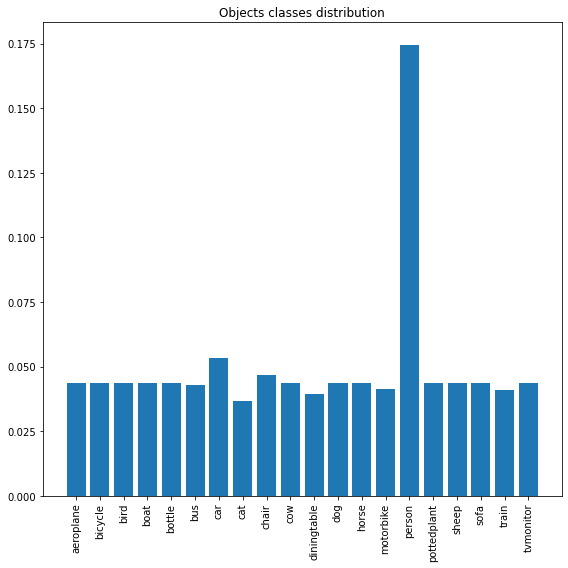

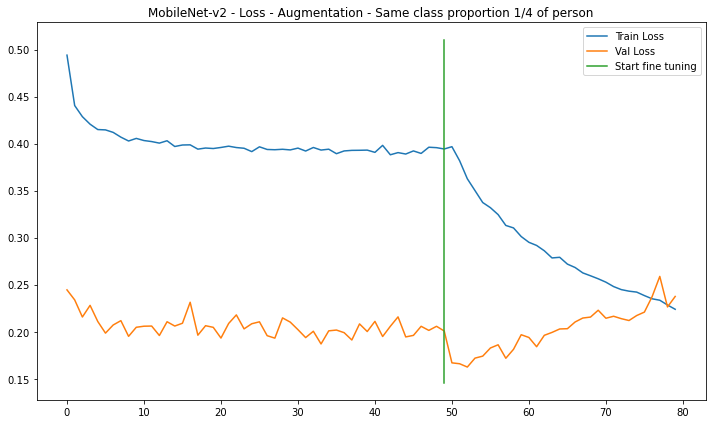

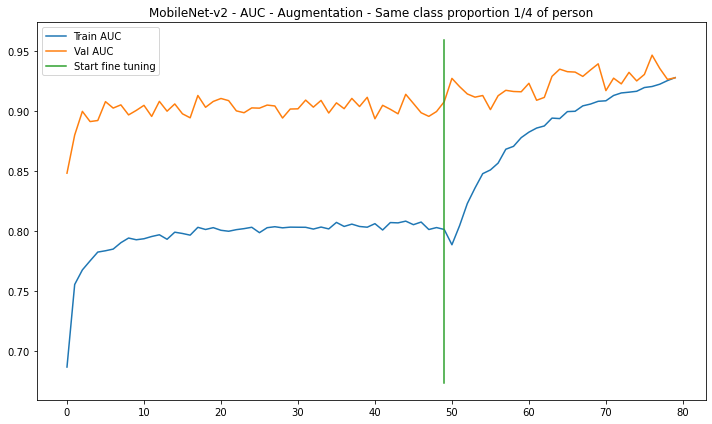

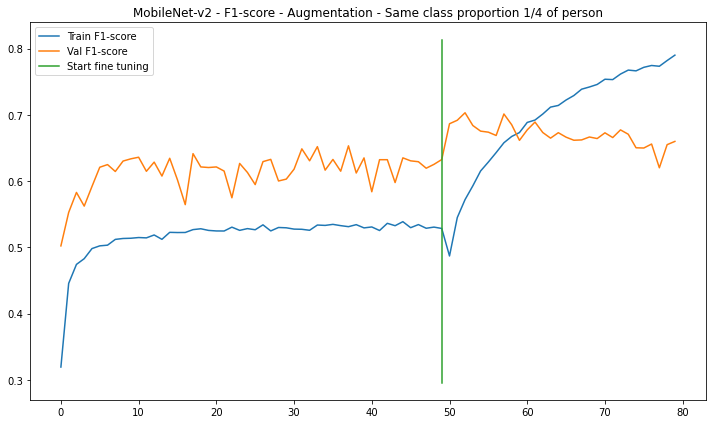

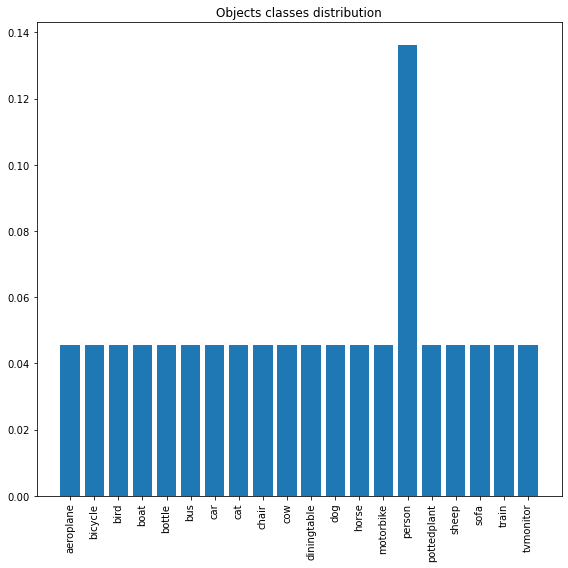

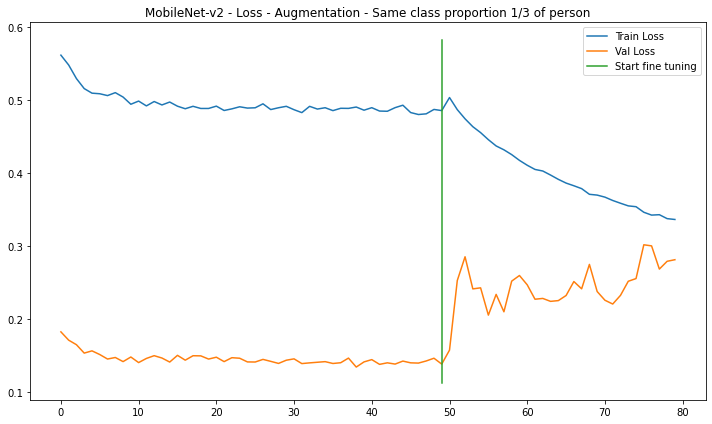

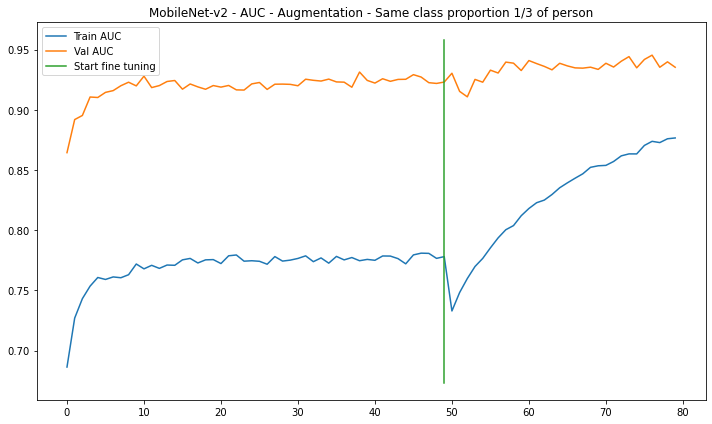

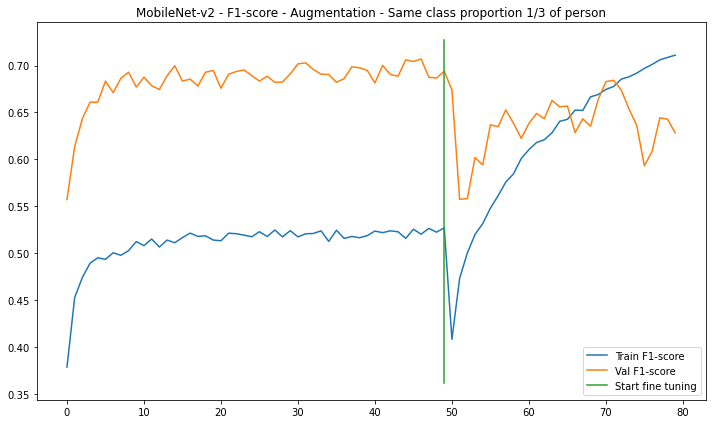

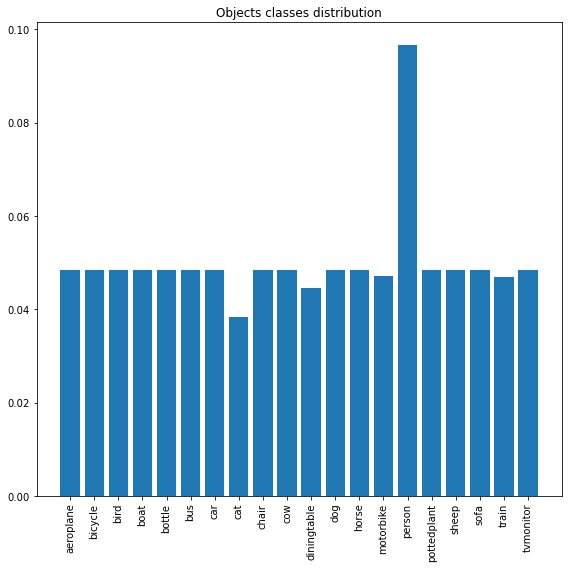

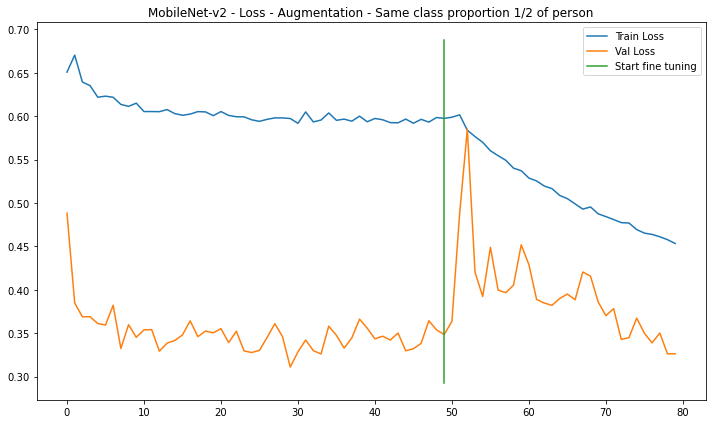

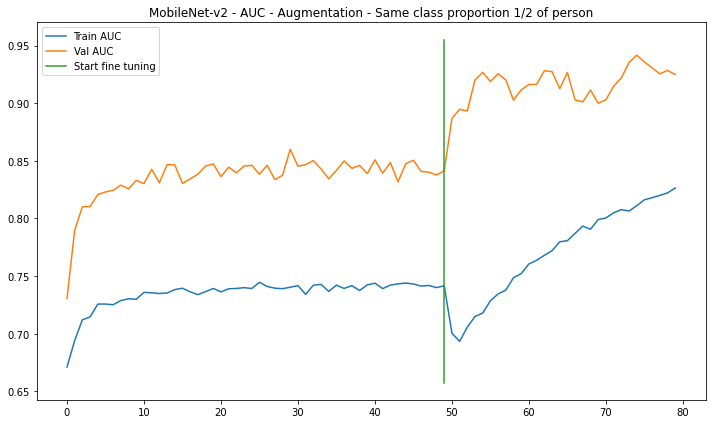

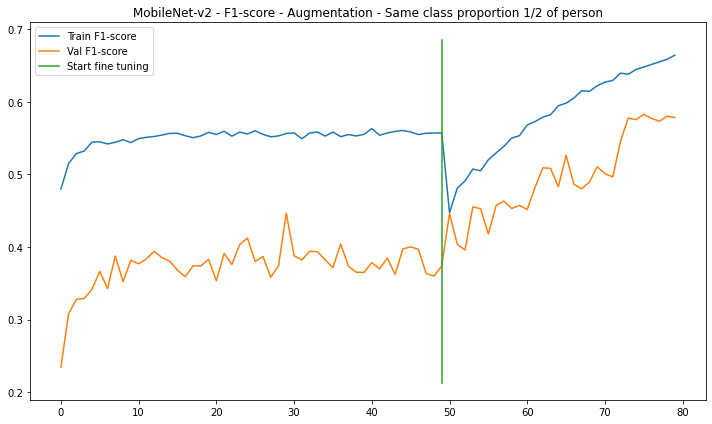

In [9]:
augmentation_mode = AugmentationMode.AugmentationSameProportion

for fraction in [4, 3, 2]:

    place_per_label, objects_per_label = sort_objects_to_balance(train_classes_counts, train_segmentations, fraction)

    experiment_name_file = f'augmentation_proportions_{fraction}'
    experiment_name_title = f'Augmentation - Same class proportion 1/{fraction} of person'
    model_file = experiment_name_file

    histogram_path = os.path.join(results_path, f'{experiment_name_file}_fine_tune_class_histogram.png')

    train_generator = TrainBalancedImageGenerator(batch_size, images_path, annotations_path, train_names, 
        image_size, place_per_label, objects_per_label, augmentation_mode, histogram_path, total_epochs, seed)

    run_experiment_fine_tune(mobile_name, results_mobile_path, models_mobile_path, 
        train_generator, (experiment_name_file, experiment_name_title), model_file)

    print(f'Finished experiment balancing up to 1/{fraction} of person objects')

#### MobileNetv2 - Augmentation without overlap applying random rotations and keeping the same class proportion

Average placed during 80 epochs: 2.9311
Average class objects during 80 epochs: [1053.55   1053.15   1053.0625 1053.325  1053.2875 1040.7875 1282.3375
  881.375  1127.225  1053.4375  957.4    1053.0125 1053.2875 1002.875
 4207.5    1053.05   1053.35   1053.4375  977.5125 1053.325 ]
Finished experiment balancing up to 1/4 of person objects
Average placed during 80 epochs: 4.6411
Average class objects during 80 epochs: [1404.475  1404.3375 1404.5375 1404.4125 1403.8625 1404.55   1402.1875
 1404.425  1402.75   1404.2375 1404.4625 1404.2875 1404.225  1403.9875
 4205.675  1404.0375 1404.325  1404.2    1404.625  1404.4375]
Finished experiment balancing up to 1/3 of person objects
Average placed during 80 epochs: 7.7813
Average class objects during 80 epochs: [2107.475  2107.4625 2107.075  2107.525  2106.6875 2107.5625 2105.15
 1669.1625 2105.725  2107.425  1942.1125 2107.3625 2107.2625 2048.4375
 4207.5    2107.5125 2107.55   2107.35   2044.225  2107.3   ]
Finished experiment balancing up to

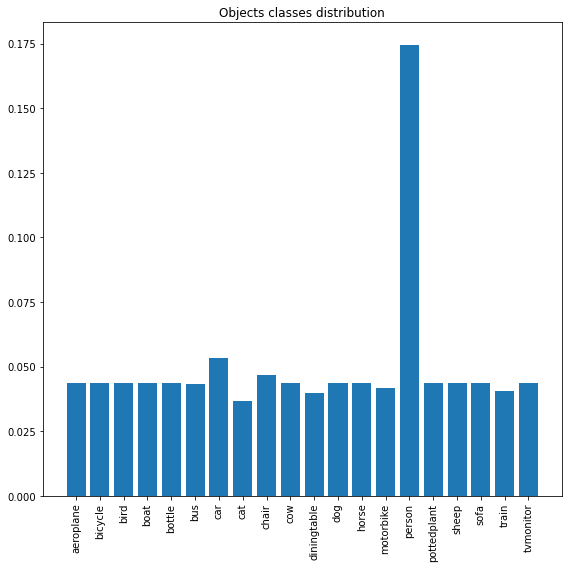

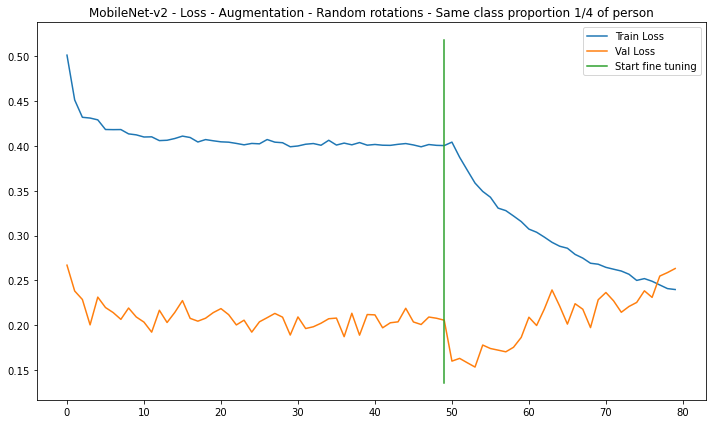

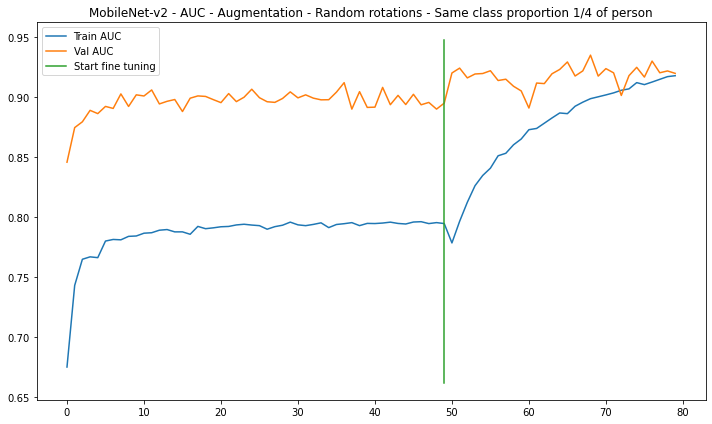

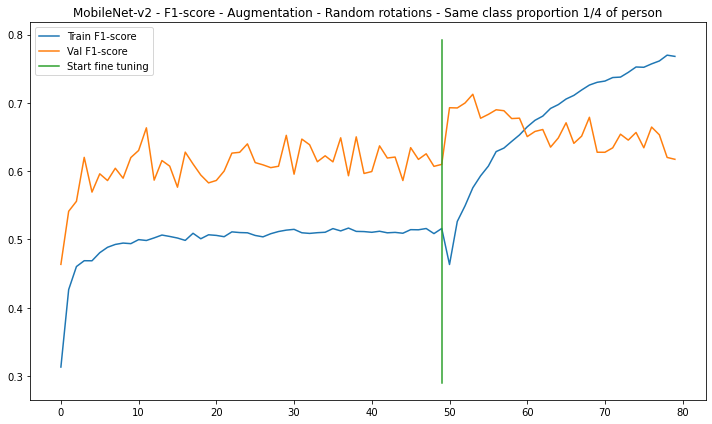

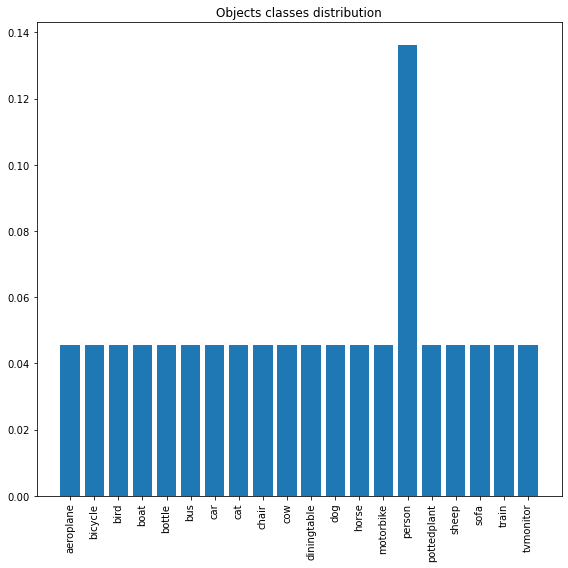

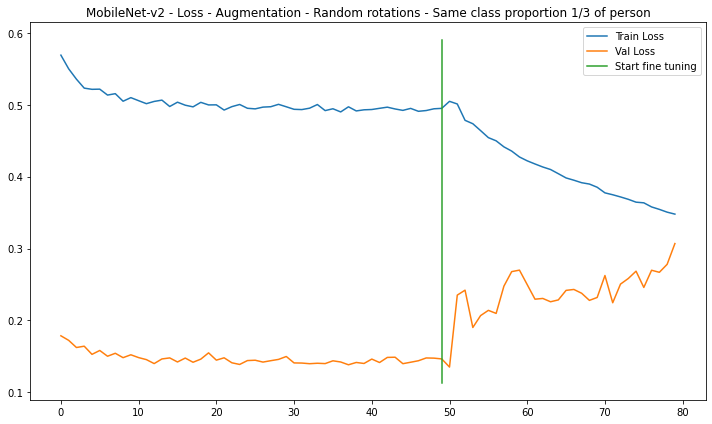

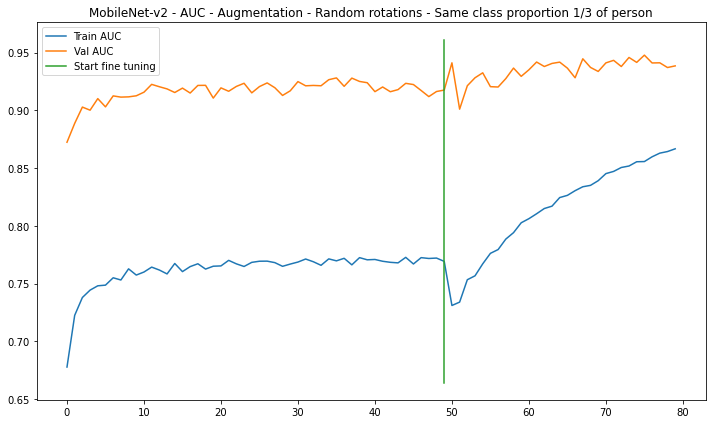

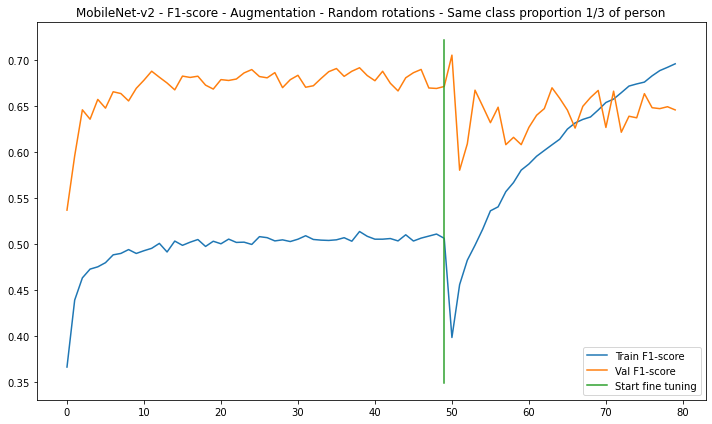

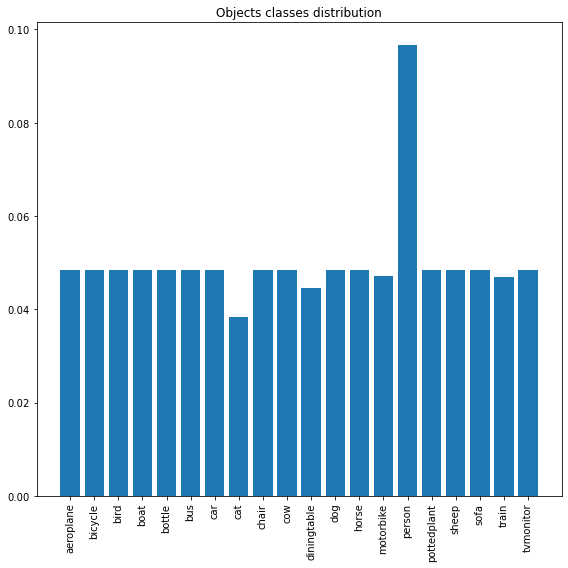

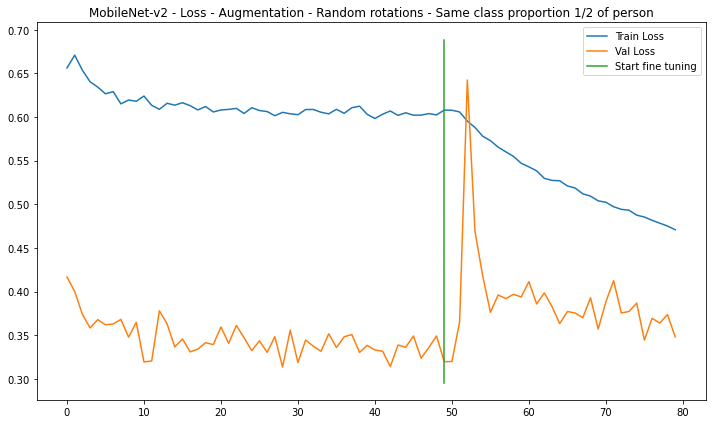

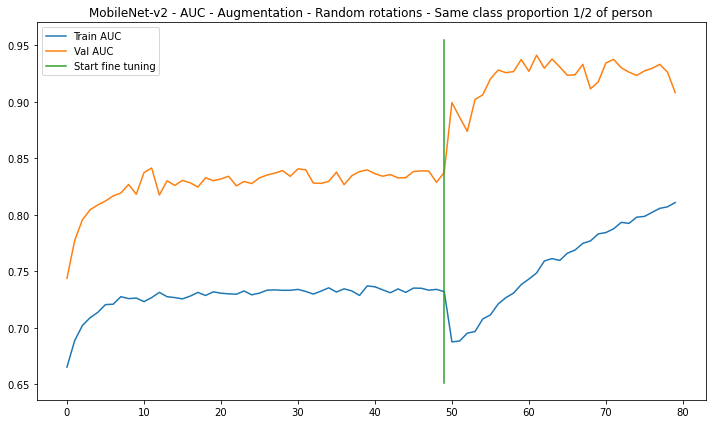

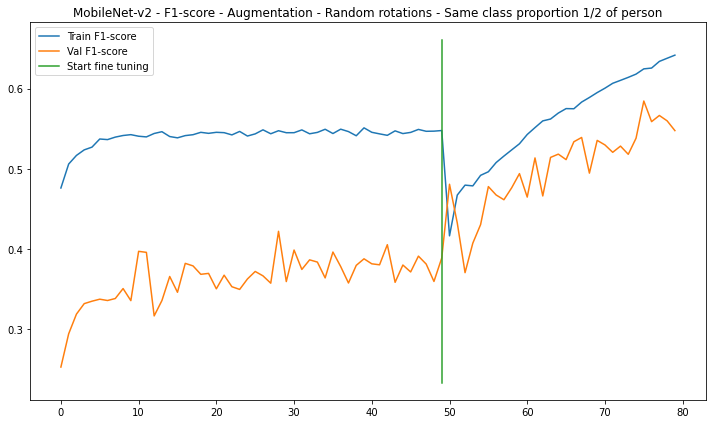

In [10]:
augmentation_mode = AugmentationMode.AugmentationRotateSameProportion

for fraction in [4, 3, 2]:

    place_per_label, objects_per_label = sort_objects_to_balance(train_classes_counts, train_segmentations, fraction)

    experiment_name_file = f'augmentation_rotate_proportions_{fraction}'
    experiment_name_title = f'Augmentation - Random rotations - Same class proportion 1/{fraction} of person'
    model_file = experiment_name_file

    histogram_path = os.path.join(results_path, f'{experiment_name_file}_fine_tune_class_histogram.png')

    train_generator = TrainBalancedImageGenerator(batch_size, images_path, annotations_path, train_names, 
        image_size, place_per_label, objects_per_label, augmentation_mode, histogram_path, total_epochs, seed)

    run_experiment_fine_tune(mobile_name, results_mobile_path, models_mobile_path, 
        train_generator, (experiment_name_file, experiment_name_title), model_file)

    print(f'Finished experiment balancing up to 1/{fraction} of person objects')

#### MobileNetv2 - Augmentation without overlap applying random scaling and keeping the same class proportion

Average placed during 80 epochs: 2.9972
Average class objects during 80 epochs: [1043.45   1052.9125 1052.85   1052.8    1052.5625  990.85   1282.9375
 1051.325  1127.3625 1048.4375 1031.6625 1053.1125 1052.9375 1043.6875
 4207.8    1052.85   1043.425  1052.4625 1037.1625 1050.5125]
Finished experiment balancing up to 1/4 of person objects
Average placed during 80 epochs: 4.6361
Average class objects during 80 epochs: [1404.5125 1404.5    1403.6875 1404.2125 1403.7375 1404.7125 1402.1875
 1404.3125 1402.35   1404.35   1404.425  1404.     1404.3625 1404.2875
 4206.85   1403.1375 1404.325  1404.125  1404.45   1404.3375]
Finished experiment balancing up to 1/3 of person objects
Average placed during 80 epochs: 7.9937
Average class objects during 80 epochs: [2107.3125 2107.35   2106.975  2107.375  2106.8875 2107.5    2105.05
 2107.35   2105.75   2107.0375 2107.5875 2107.2625 2107.25   2107.3375
 4207.0875 2107.25   2107.125  2107.4875 2107.5    2107.5375]
Finished experiment balancing up t

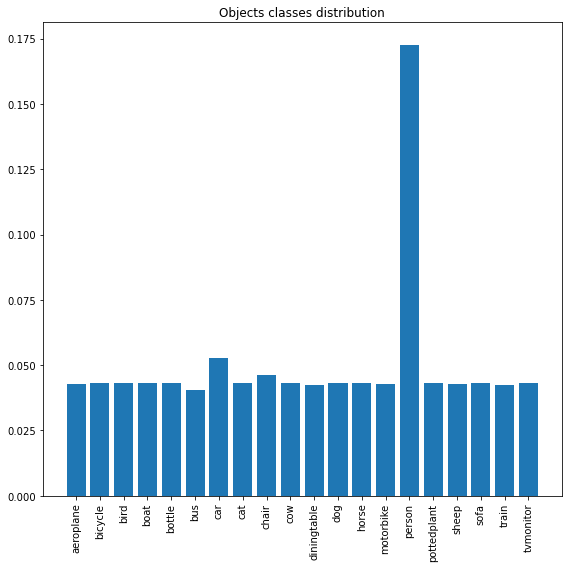

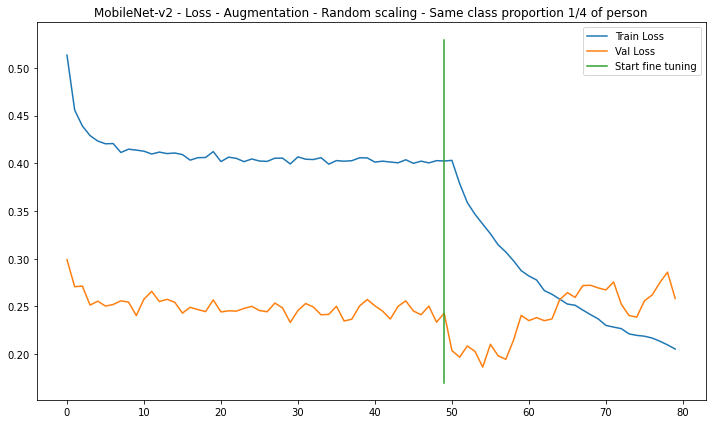

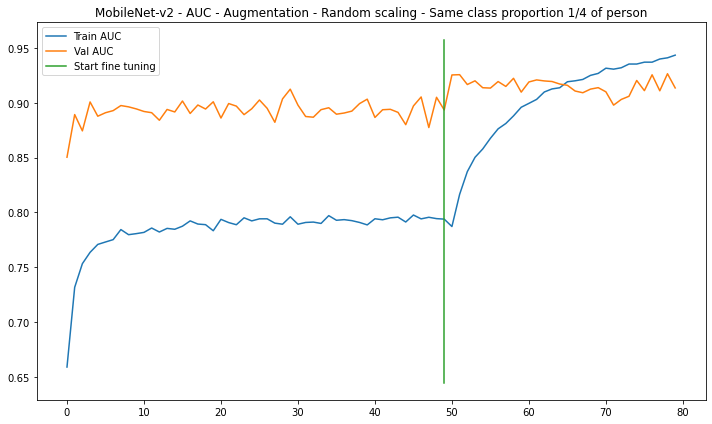

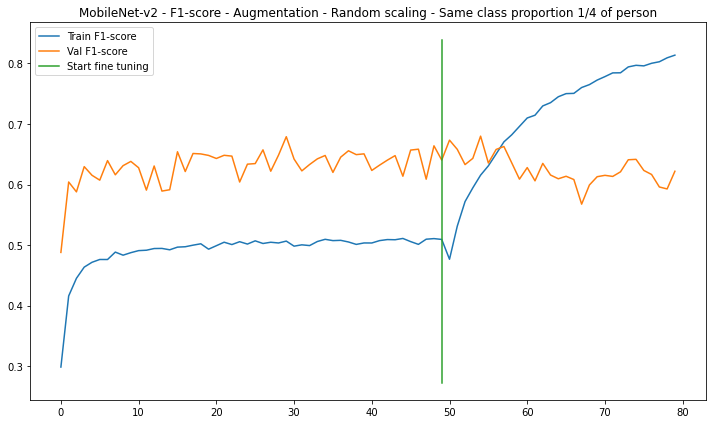

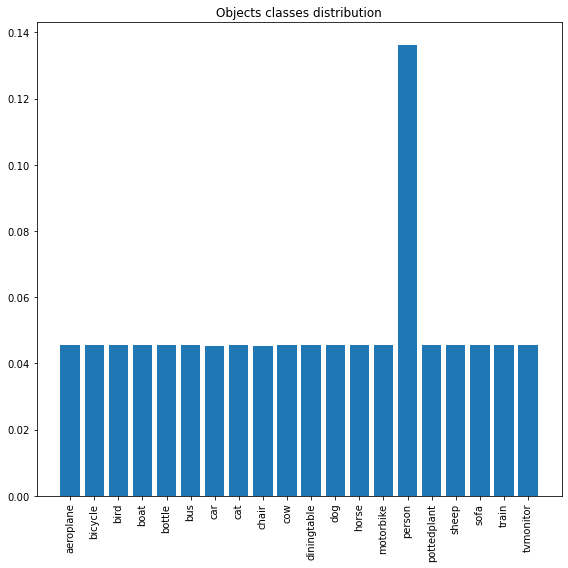

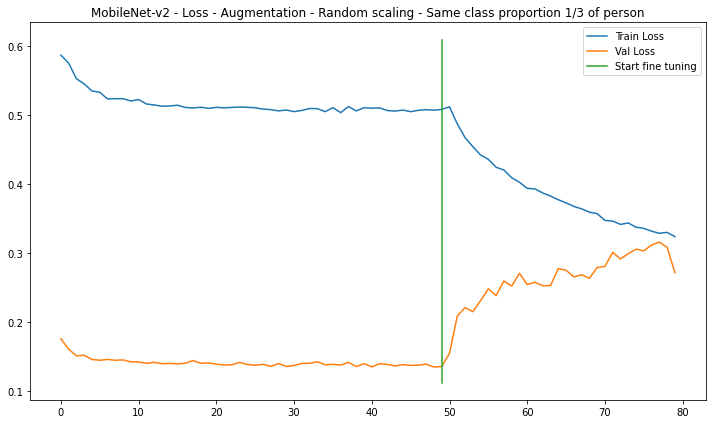

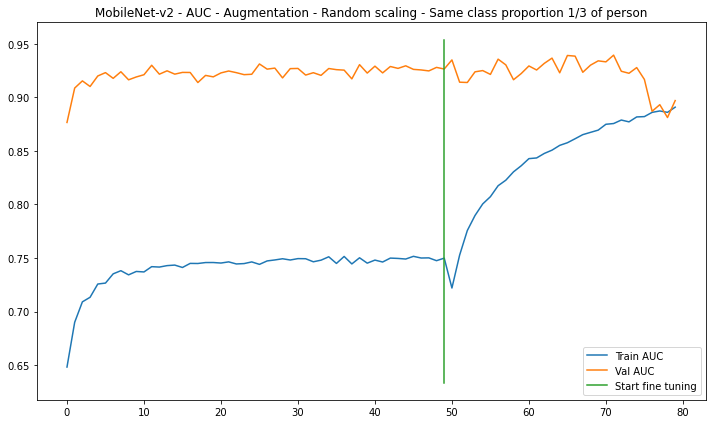

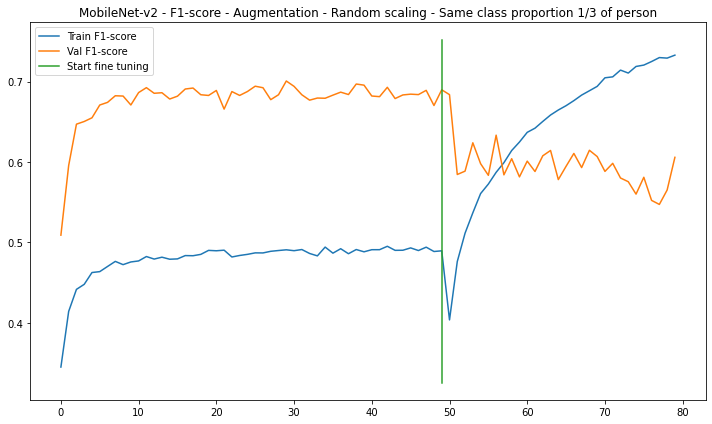

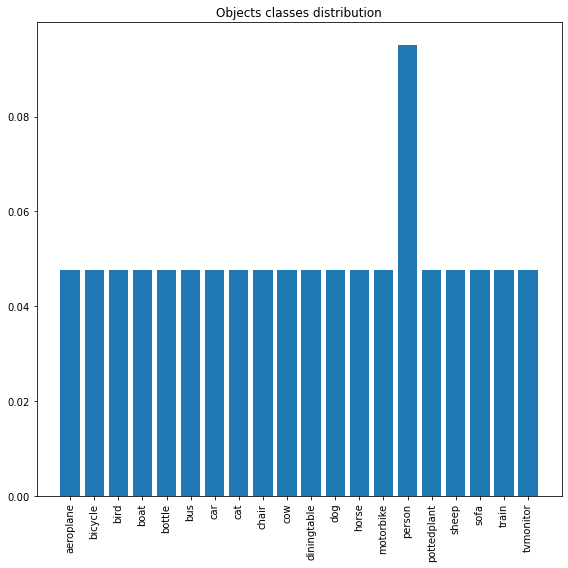

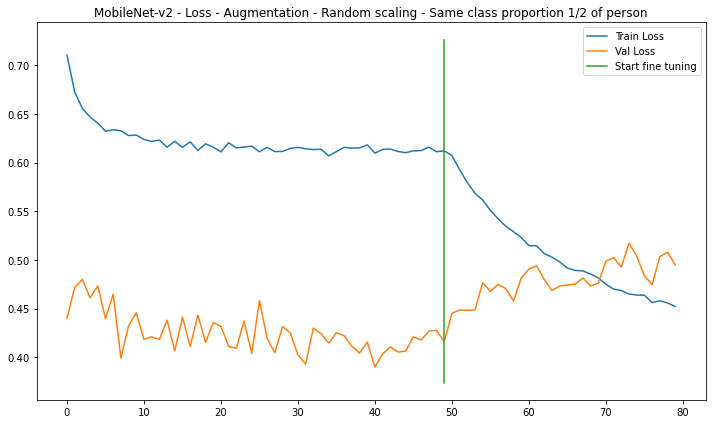

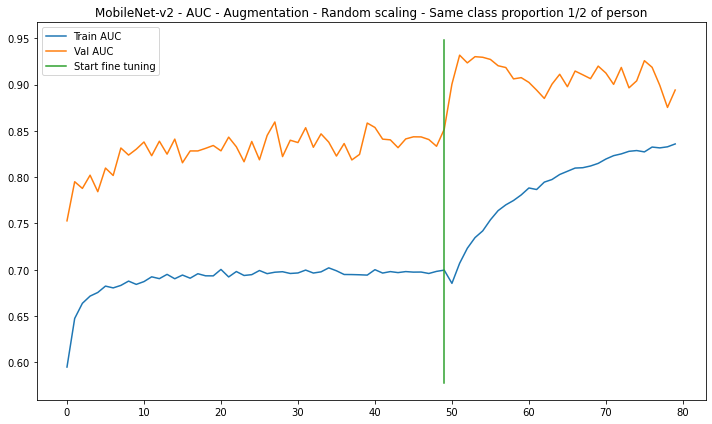

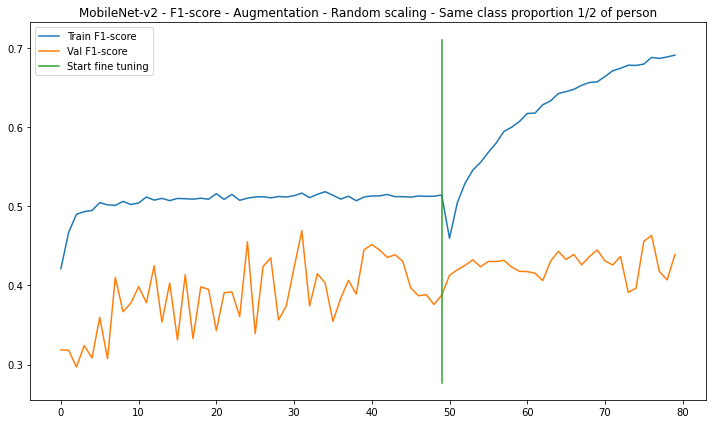

In [11]:
augmentation_mode = AugmentationMode.AugmentationScaleSameProportion

for fraction in [4, 3, 2]:

    place_per_label, objects_per_label = sort_objects_to_balance(train_classes_counts, train_segmentations, fraction)

    experiment_name_file = f'augmentation_scaling_proportions_{fraction}'
    experiment_name_title = f'Augmentation - Random scaling - Same class proportion 1/{fraction} of person'
    model_file = experiment_name_file

    histogram_path = os.path.join(results_path, f'{experiment_name_file}_fine_tune_class_histogram.png')

    train_generator = TrainBalancedImageGenerator(batch_size, images_path, annotations_path, train_names, 
        image_size, place_per_label, objects_per_label, augmentation_mode, histogram_path, total_epochs, seed)

    run_experiment_fine_tune(mobile_name, results_mobile_path, models_mobile_path, 
        train_generator, (experiment_name_file, experiment_name_title), model_file)

    print(f'Finished experiment balancing up to 1/{fraction} of person objects')

#### MobileNetv2 - Augmentation without overlap applying random transformations and keeping the same class proportion

Average placed during 80 epochs: 7.9961
Average class objects during 80 epochs: [2107.45   2107.175  2107.0625 2107.3    2107.1625 2107.6375 2105.7875
 2107.45   2105.3125 2107.4375 2107.3625 2107.05   2107.2625 2107.3625
 4207.3125 2106.925  2107.1875 2107.4125 2107.6125 2107.3875]
Finished experiment balancing up to 1/2 of person objects


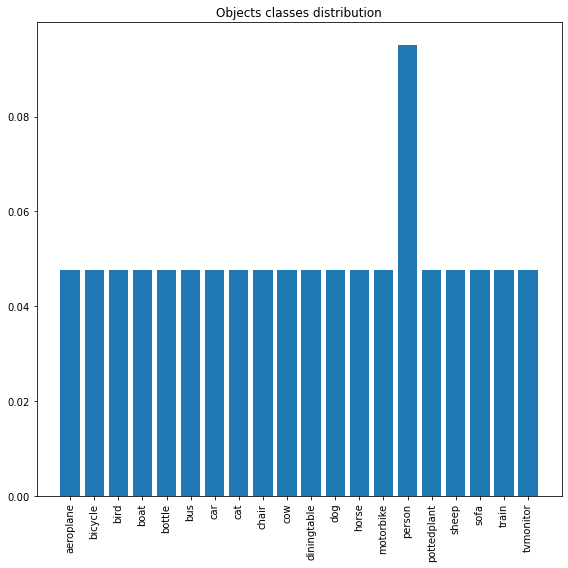

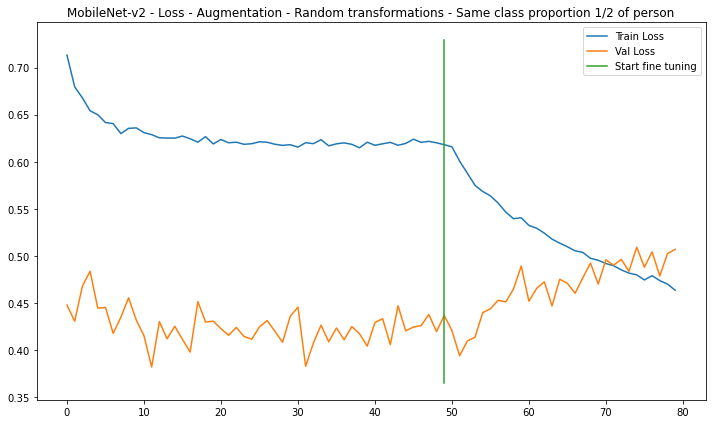

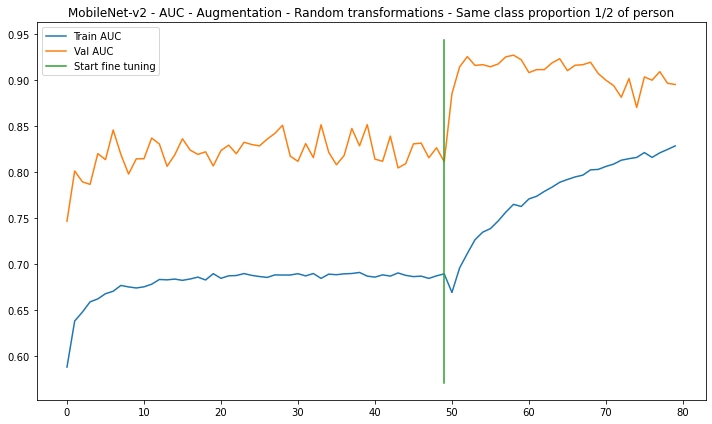

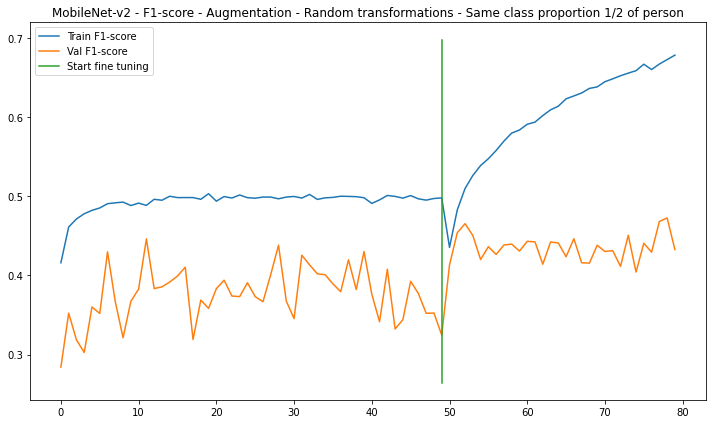

In [11]:
augmentation_mode = AugmentationMode.AugmentationTransformSameProportion

for fraction in [2]:

    place_per_label, objects_per_label = sort_objects_to_balance(train_classes_counts, train_segmentations, fraction)

    experiment_name_file = f'augmentation_transform_proportions_{fraction}'
    experiment_name_title = f'Augmentation - Random transformations - Same class proportion 1/{fraction} of person'
    model_file = experiment_name_file

    histogram_path = os.path.join(results_path, f'{experiment_name_file}_fine_tune_class_histogram.png')

    train_generator = TrainBalancedImageGenerator(batch_size, images_path, annotations_path, train_names, 
        image_size, place_per_label, objects_per_label, augmentation_mode, histogram_path, total_epochs, seed)

    run_experiment_fine_tune(mobile_name, results_mobile_path, models_mobile_path, 
        train_generator, (experiment_name_file, experiment_name_title), model_file)

    print(f'Finished experiment balancing up to 1/{fraction} of person objects')

#### MobileNetv2 - Augmentation with overlap

Average placed during 80 epochs: 1.0002
Finished experiment placing 1 objects
Average placed during 80 epochs: 3.0006
Finished experiment placing 3 objects
Average placed during 80 epochs: 5.0010
Finished experiment placing 5 objects


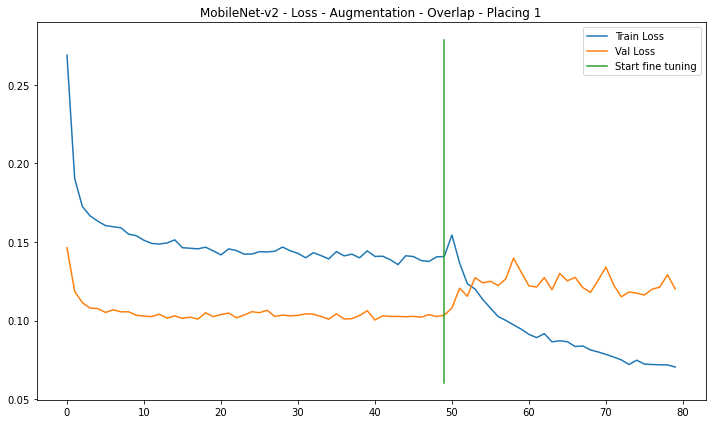

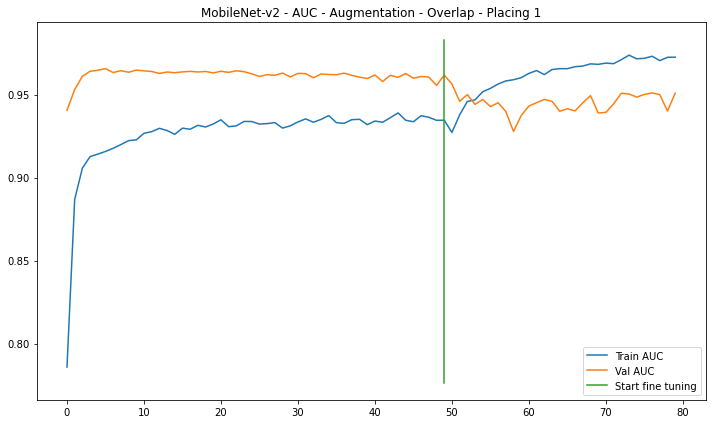

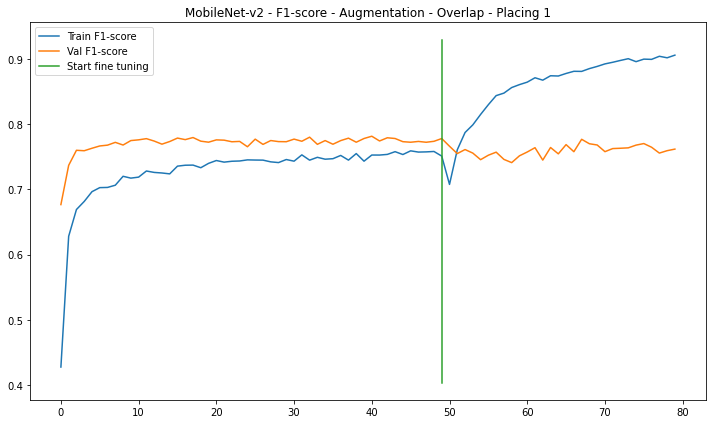

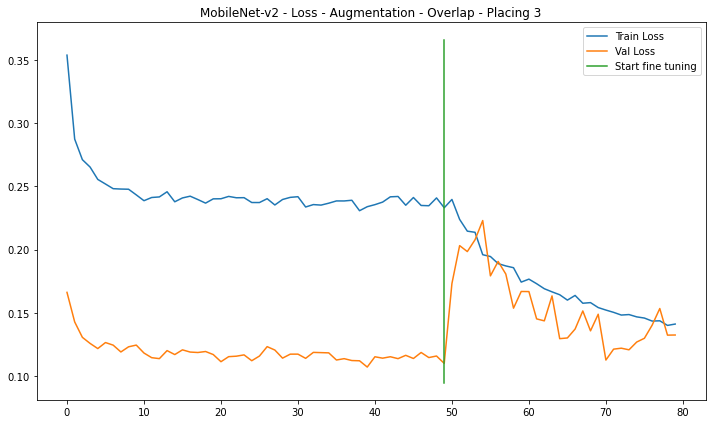

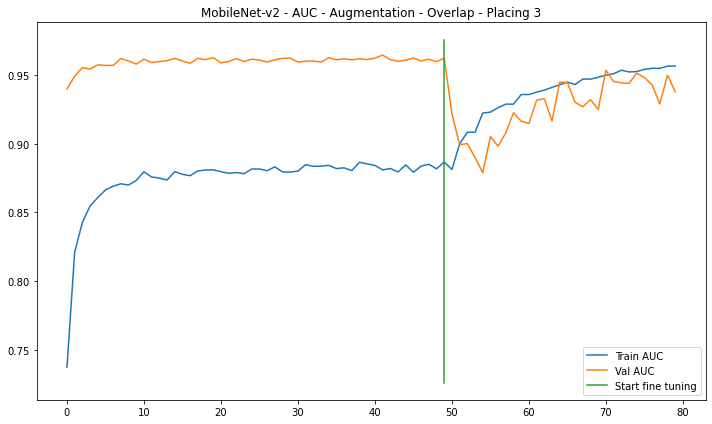

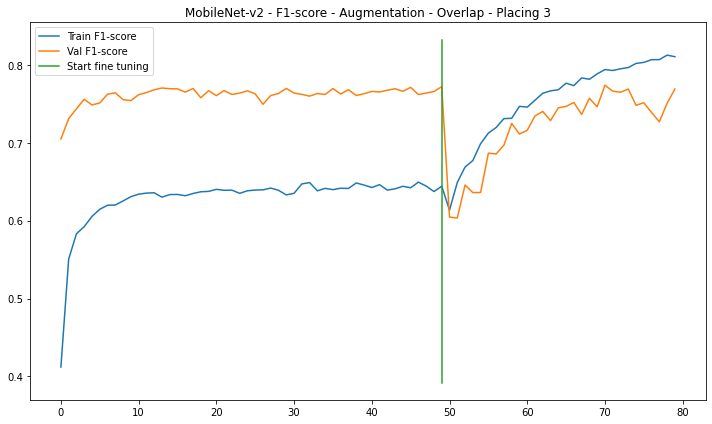

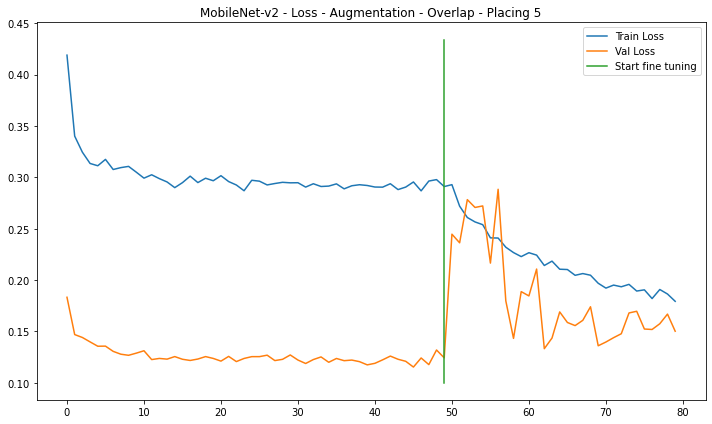

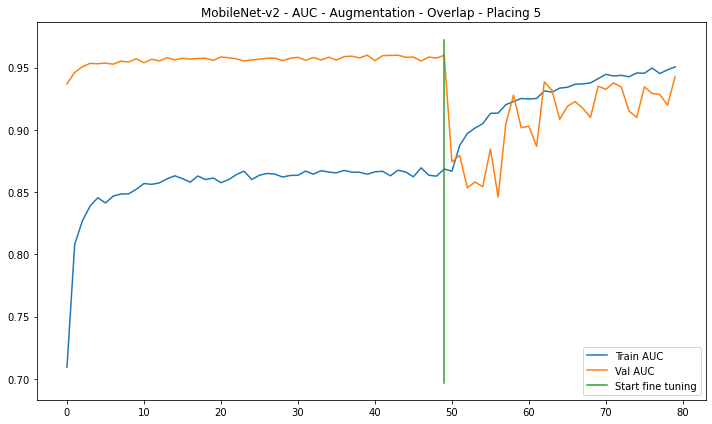

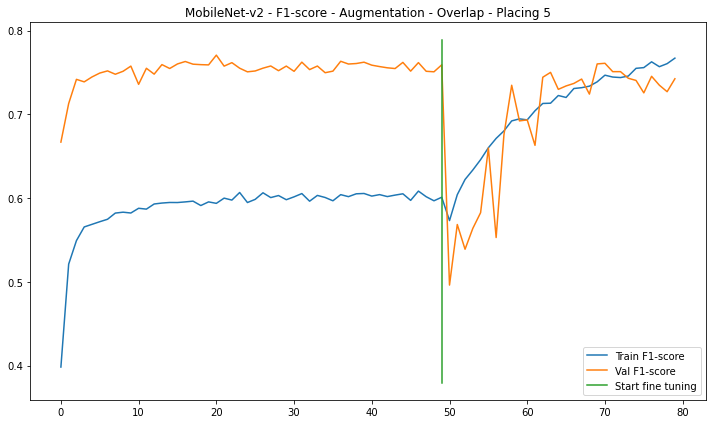

In [11]:
augmentation_mode = AugmentationMode.AugmentationOverlap

for num_to_place in [1, 3, 5]:

    train_generator = TrainImageGenerator(batch_size, images_path, annotations_path, train_names, 
        image_size, train_segmentations, augmentation_mode, num_to_place, prob_augment, total_epochs, seed)

    experiment_name_file = f'augmentation_overlap_{num_to_place}'
    experiment_name_title = f'Augmentation - Overlap - Placing {num_to_place}'
    model_file = experiment_name_file

    run_experiment_fine_tune(mobile_name, results_mobile_path, models_mobile_path, 
        train_generator, (experiment_name_file, experiment_name_title), model_file)

    print(f'Finished experiment placing {num_to_place} objects')

#### MobileNetv2 - Augmentation with overlap and random rotations

Average placed during 80 epochs: 1.0002
Finished experiment placing 1 objects
Average placed during 80 epochs: 3.0006
Finished experiment placing 3 objects
Average placed during 80 epochs: 5.0010
Finished experiment placing 5 objects


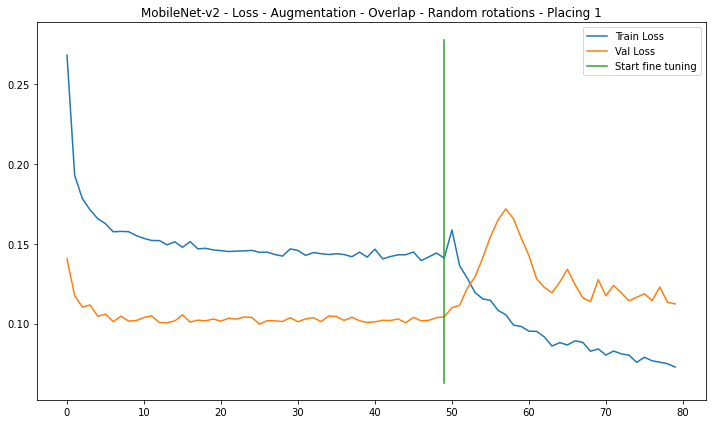

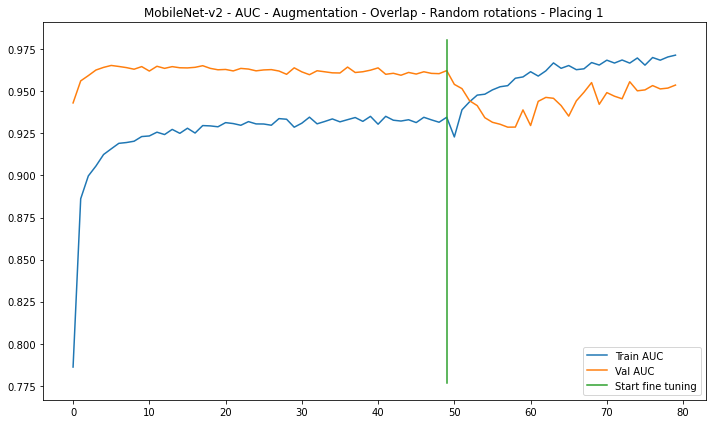

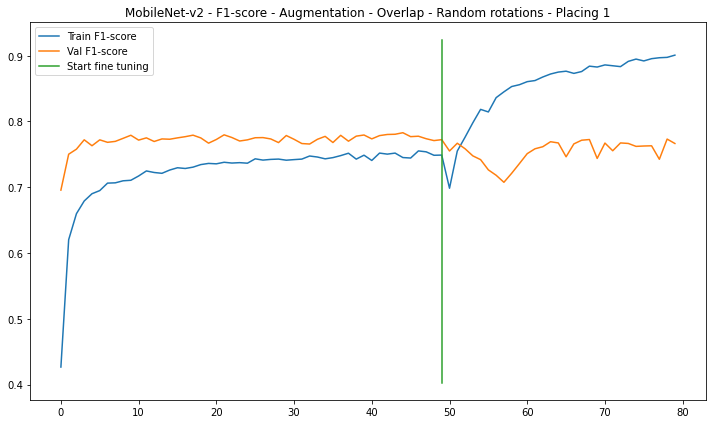

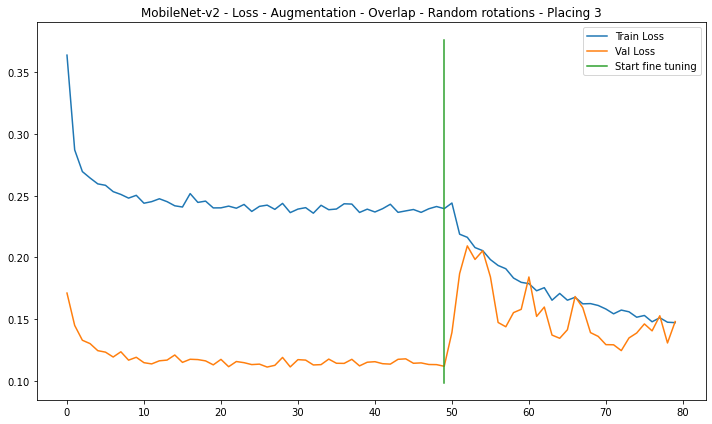

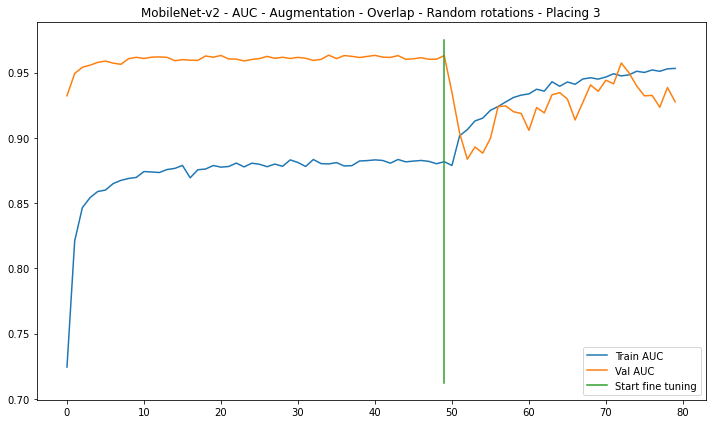

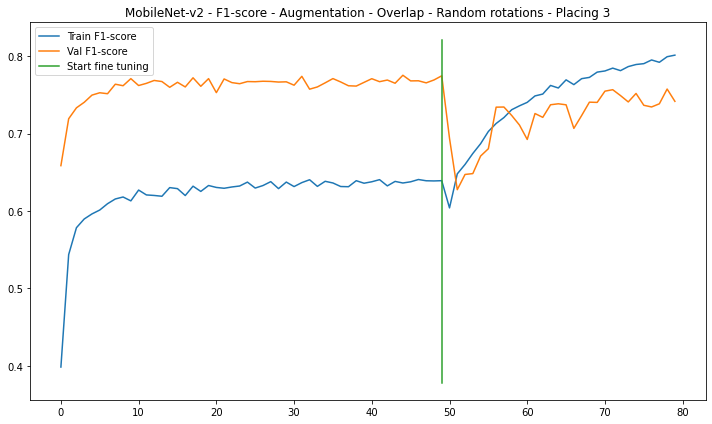

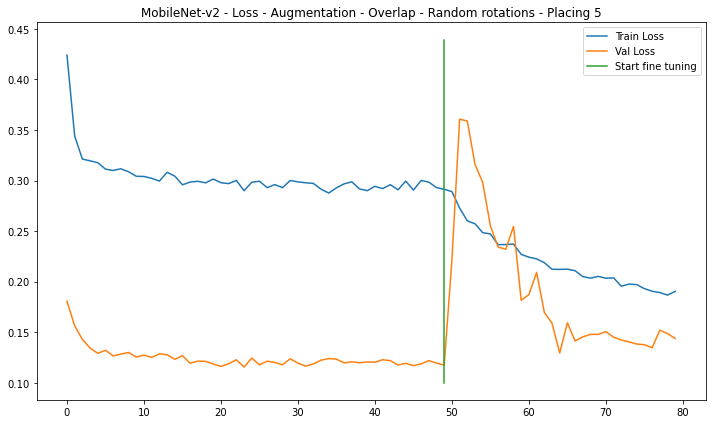

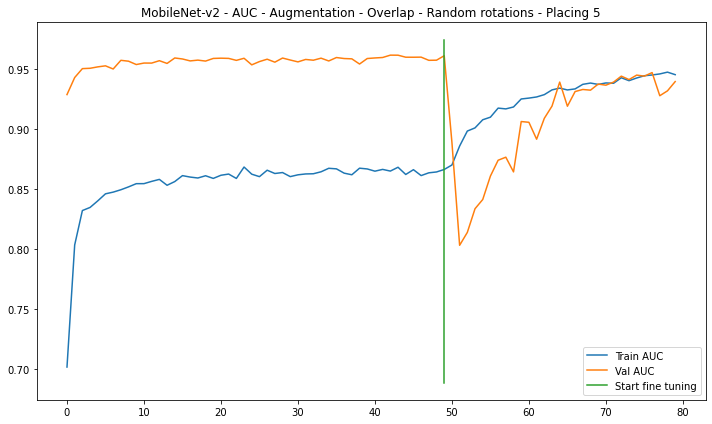

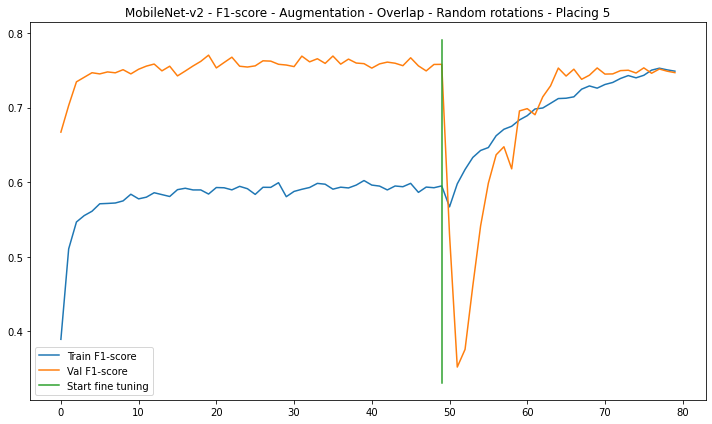

In [9]:
augmentation_mode = AugmentationMode.AugmentationOverlapRotate

for num_to_place in [1, 3, 5]:

    train_generator = TrainImageGenerator(batch_size, images_path, annotations_path, train_names, 
        image_size, train_segmentations, augmentation_mode, num_to_place, prob_augment, total_epochs, seed)

    experiment_name_file = f'augmentation_rotate_overlap_{num_to_place}'
    experiment_name_title = f'Augmentation - Overlap - Random rotations - Placing {num_to_place}'
    model_file = experiment_name_file

    run_experiment_fine_tune(mobile_name, results_mobile_path, models_mobile_path, 
        train_generator, (experiment_name_file, experiment_name_title), model_file)

    print(f'Finished experiment placing {num_to_place} objects')

#### MobileNetv2 - Augmentation with overlap and random scaling

Average placed during 80 epochs: 1.0002
Finished experiment placing 1 objects
Average placed during 80 epochs: 3.0006
Finished experiment placing 3 objects
Average placed during 80 epochs: 5.0010
Finished experiment placing 5 objects


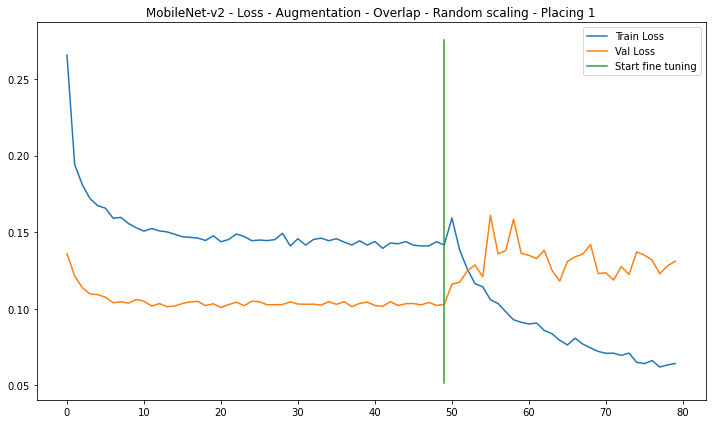

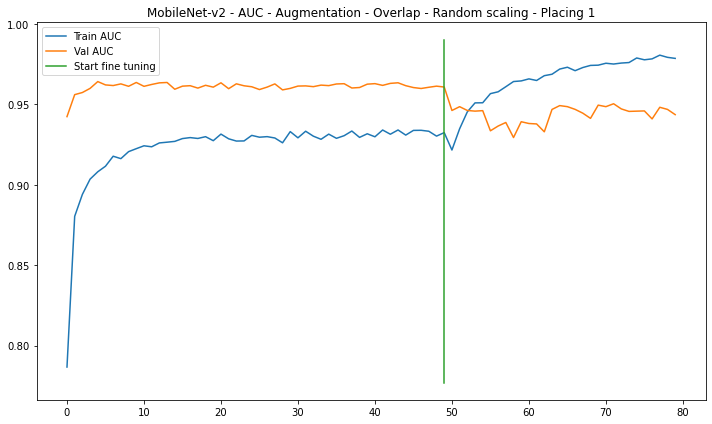

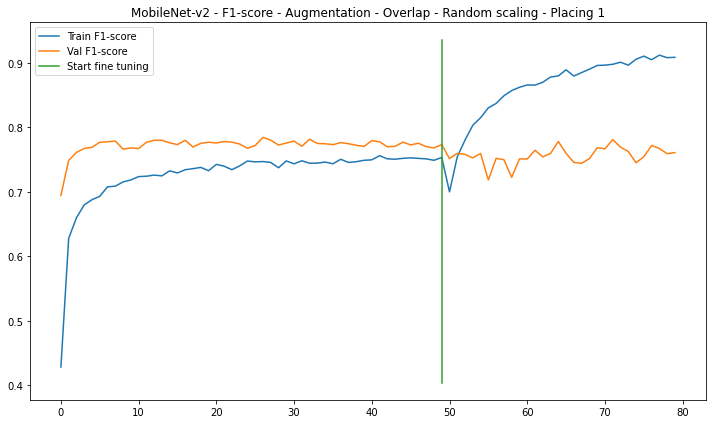

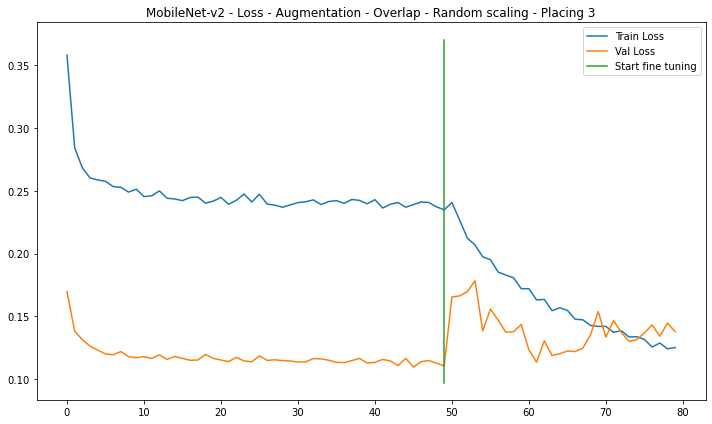

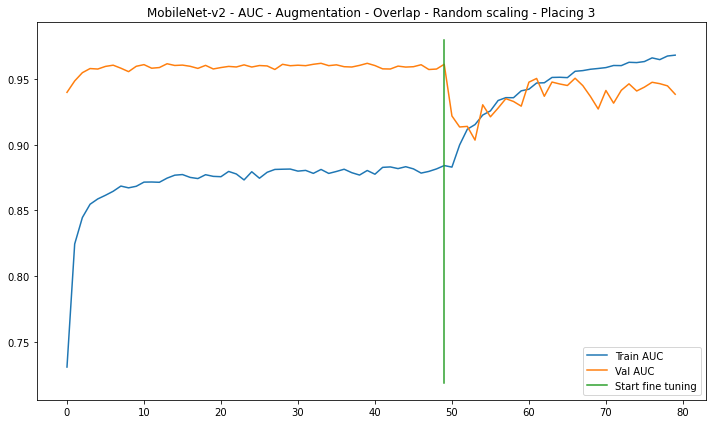

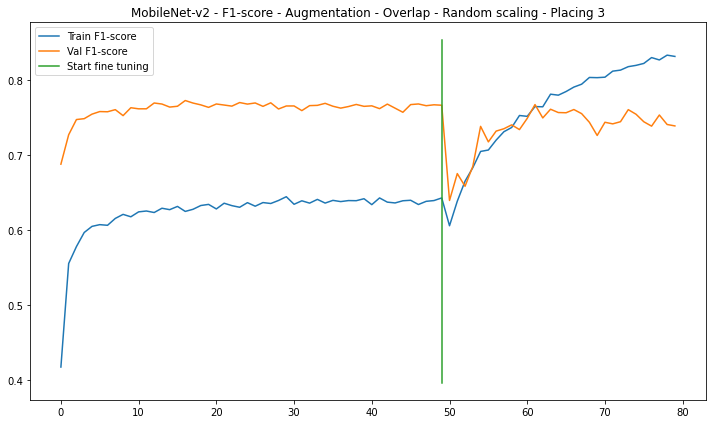

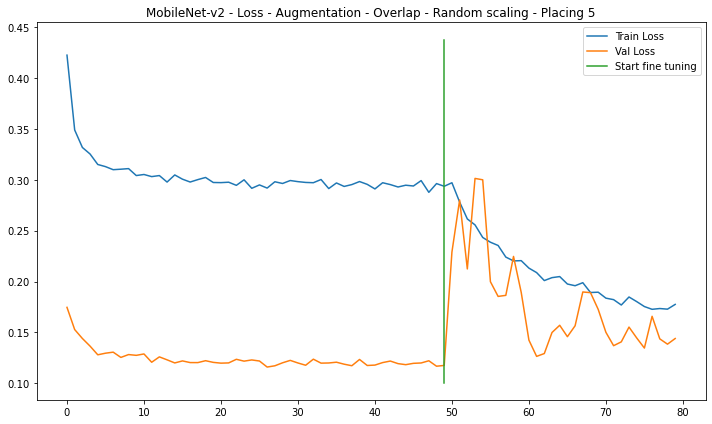

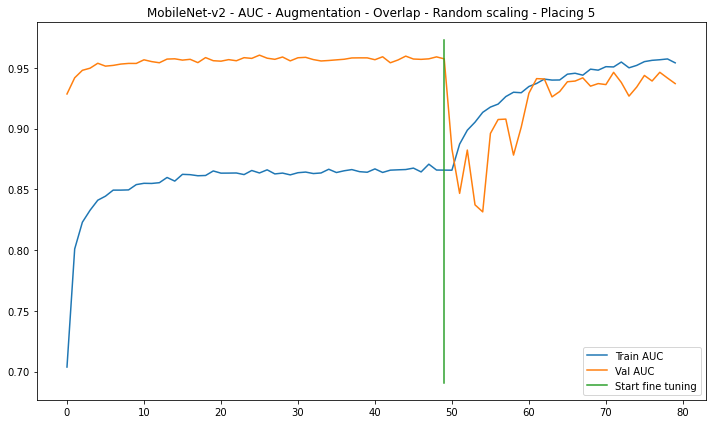

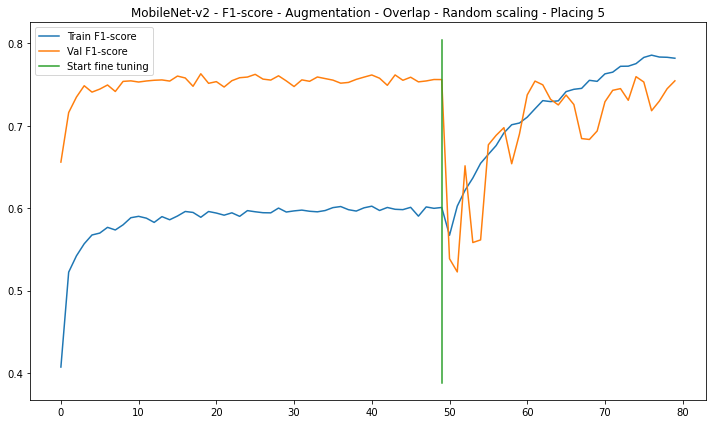

In [10]:
augmentation_mode = AugmentationMode.AugmentationOverlapScale

for num_to_place in [1, 3, 5]:

    train_generator = TrainImageGenerator(batch_size, images_path, annotations_path, train_names, 
        image_size, train_segmentations, augmentation_mode, num_to_place, prob_augment, total_epochs, seed)

    experiment_name_file = f'augmentation_scale_overlap_{num_to_place}'
    experiment_name_title = f'Augmentation - Overlap - Random scaling - Placing {num_to_place}'
    model_file = experiment_name_file

    run_experiment_fine_tune(mobile_name, results_mobile_path, models_mobile_path, 
        train_generator, (experiment_name_file, experiment_name_title), model_file)

    print(f'Finished experiment placing {num_to_place} objects')

#### MobileNetv2 - Augmentation with overlap and random transformations

Average placed during 80 epochs: 1.0002
Finished experiment placing 1 objects
Average placed during 80 epochs: 3.0006
Finished experiment placing 3 objects
Average placed during 80 epochs: 5.0010
Finished experiment placing 5 objects


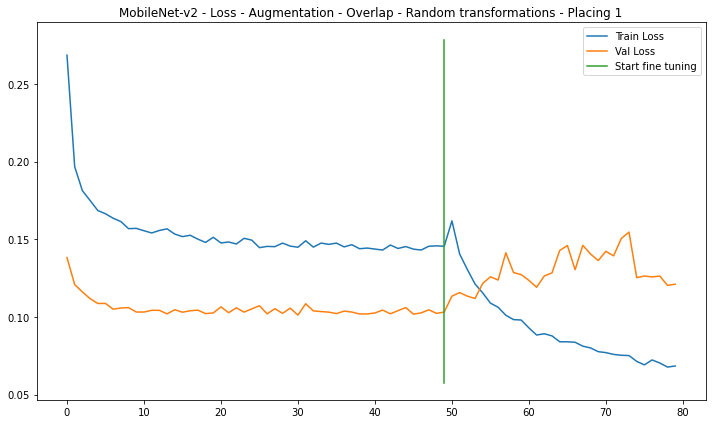

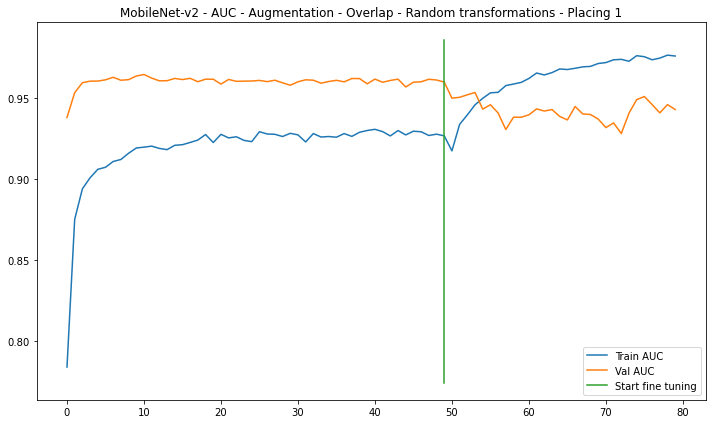

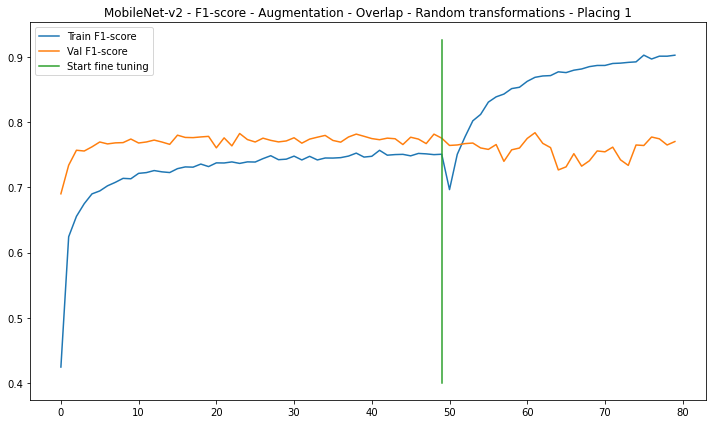

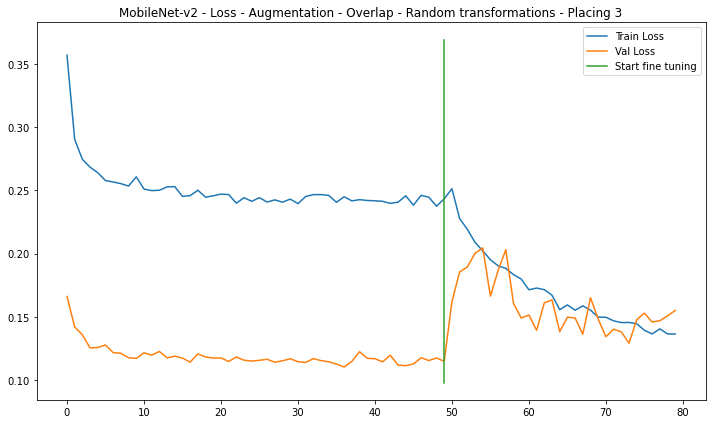

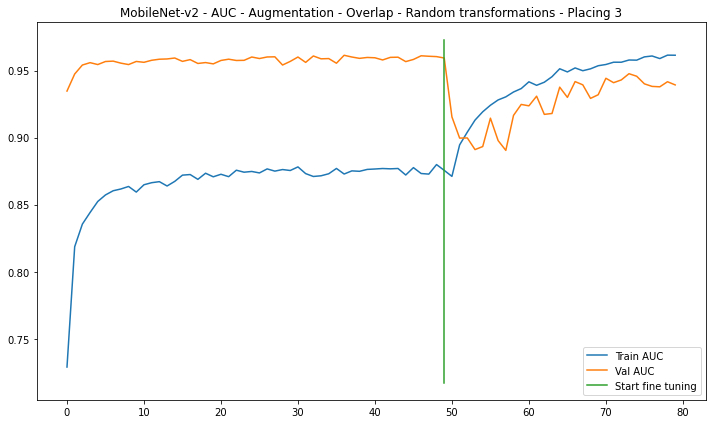

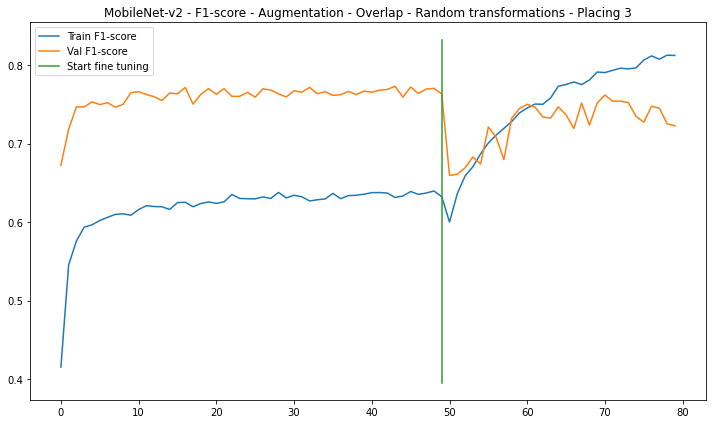

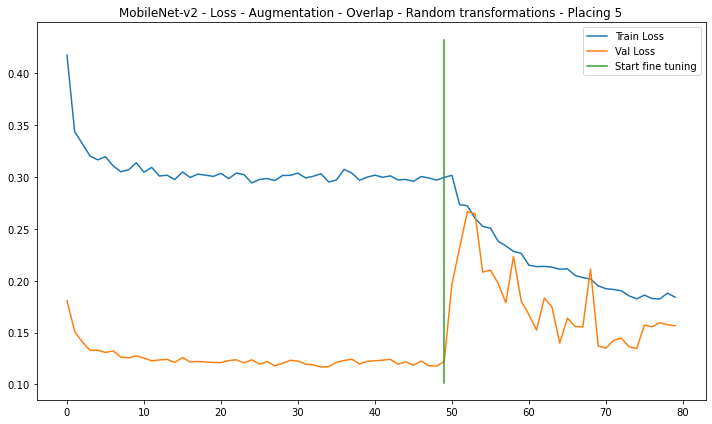

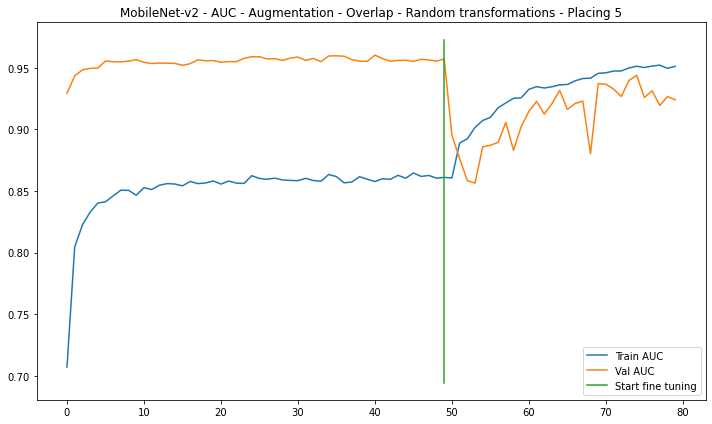

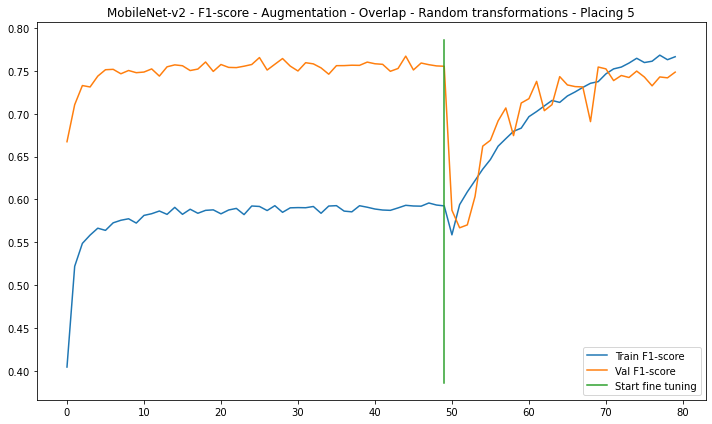

In [11]:
augmentation_mode = AugmentationMode.AugmentationOverlapTransform

for num_to_place in [1, 3, 5]:

    train_generator = TrainImageGenerator(batch_size, images_path, annotations_path, train_names, 
        image_size, train_segmentations, augmentation_mode, num_to_place, prob_augment, total_epochs, seed)

    experiment_name_file = f'augmentation_transform_overlap_{num_to_place}'
    experiment_name_title = f'Augmentation - Overlap - Random transformations - Placing {num_to_place}'
    model_file = experiment_name_file

    run_experiment_fine_tune(mobile_name, results_mobile_path, models_mobile_path, 
        train_generator, (experiment_name_file, experiment_name_title), model_file)

    print(f'Finished experiment placing {num_to_place} objects')

#### MobileNetv2 - Augmentation with overlap and equal proportions of labels

Average placed during 80 epochs: 3.0006
Average class objects during 80 epochs: [1037.9875 1053.1125 1052.9    1051.825  1053.1875  999.275  1282.6125
 1052.7125 1127.8375 1051.     1029.075  1053.1125 1052.9875 1051.1625
 4207.3875 1053.025  1044.9375 1053.225  1034.9125 1051.6625]
Finished experiment balancing up to 1/4 of person objects
Average placed during 80 epochs: 4.6396
Average class objects during 80 epochs: [1404.2125 1404.6    1404.275  1403.925  1403.875  1404.7375 1402.5625
 1404.525  1402.3125 1404.475  1404.4    1404.2125 1404.3375 1404.3625
 4208.0875 1404.1    1404.5    1404.25   1404.2375 1404.475 ]
Finished experiment balancing up to 1/3 of person objects
Average placed during 80 epochs: 7.9971
Average class objects during 80 epochs: [2107.3875 2107.2125 2107.2    2107.4375 2106.1125 2107.5625 2105.8375
 2107.475  2105.6375 2107.525  2107.4125 2107.075  2107.2875 2107.4125
 4207.225  2107.1375 2107.375  2107.15   2107.625  2107.3125]
Finished experiment balancing up

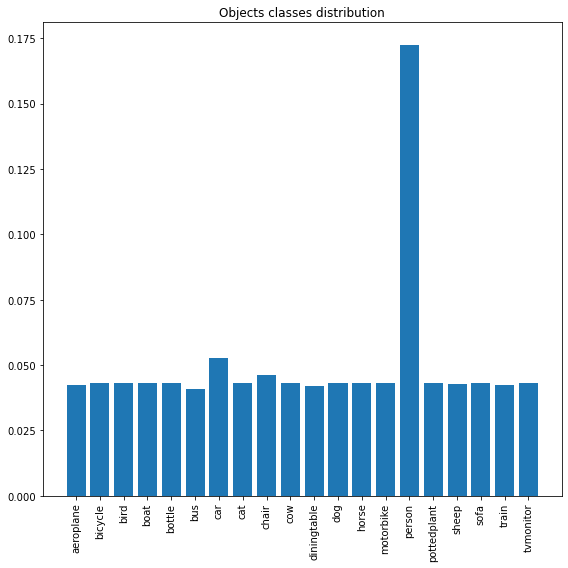

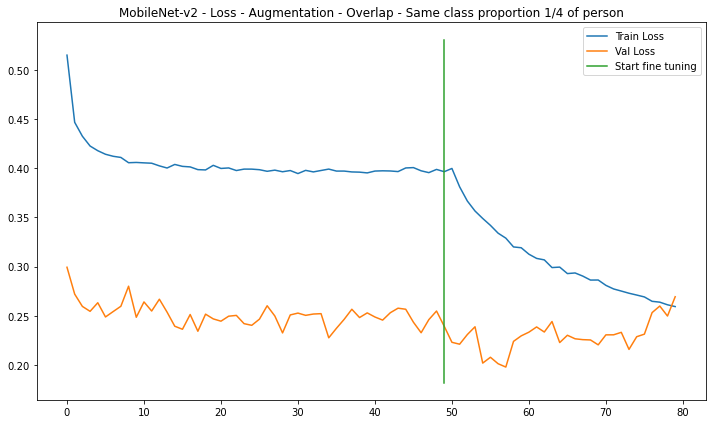

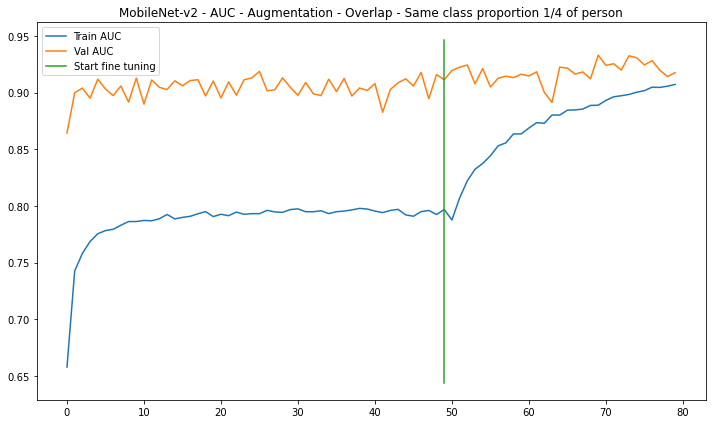

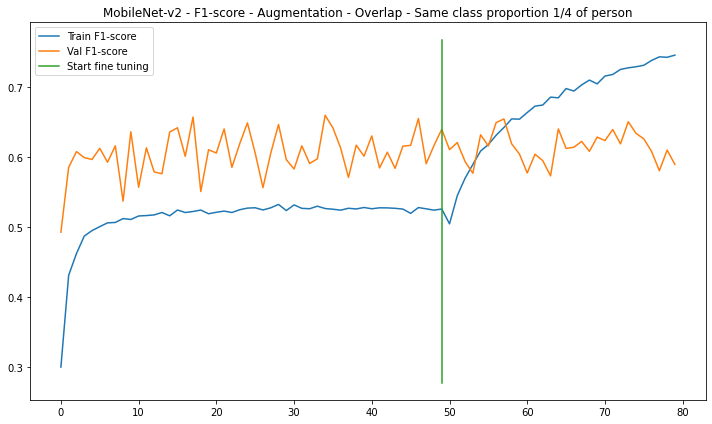

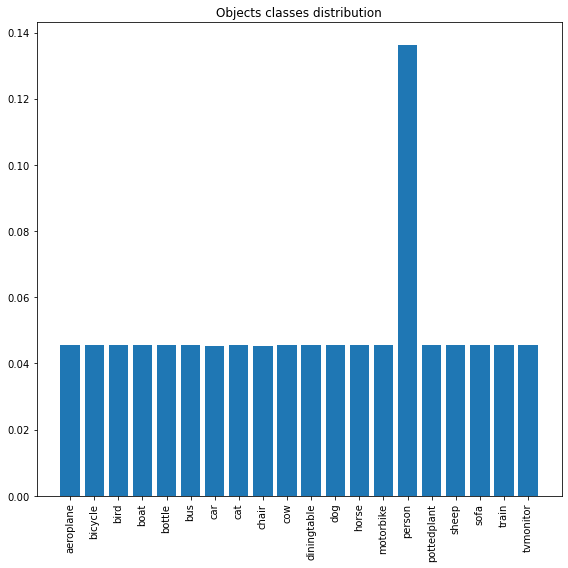

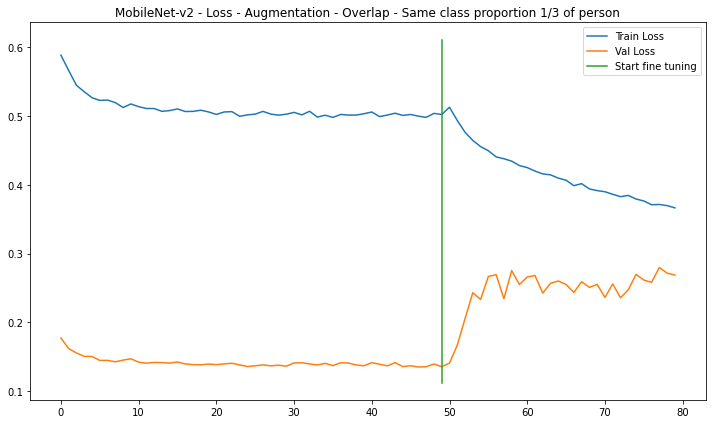

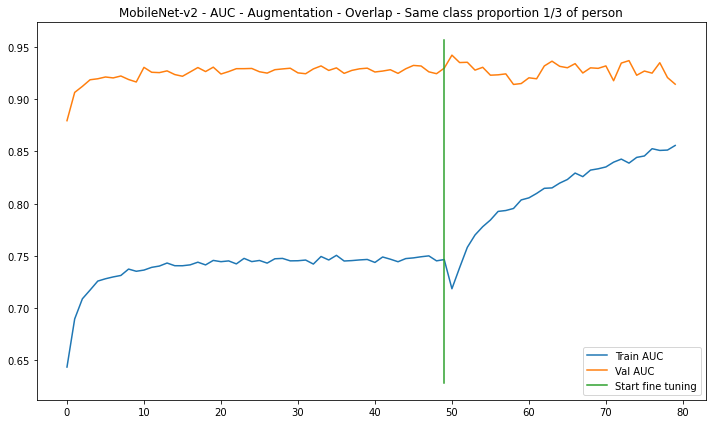

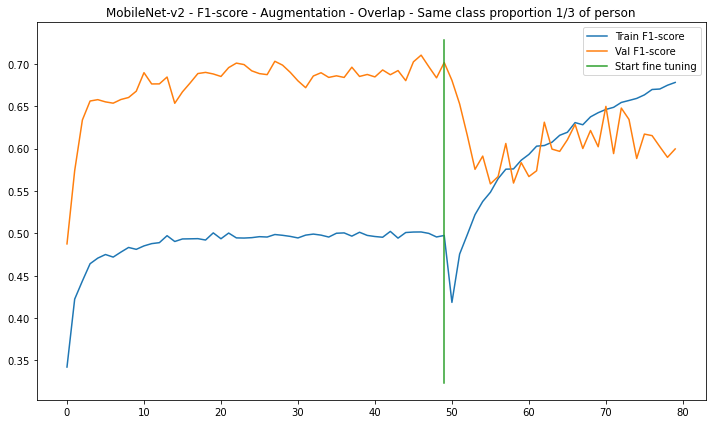

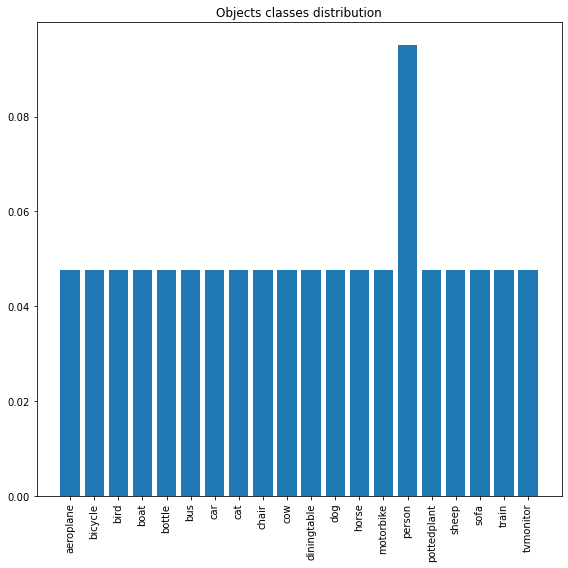

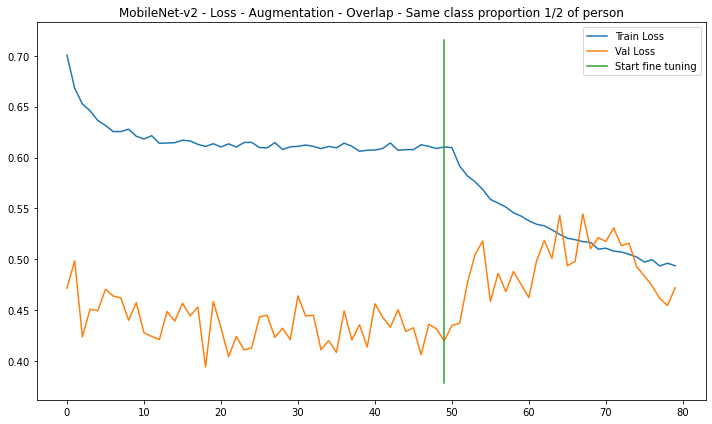

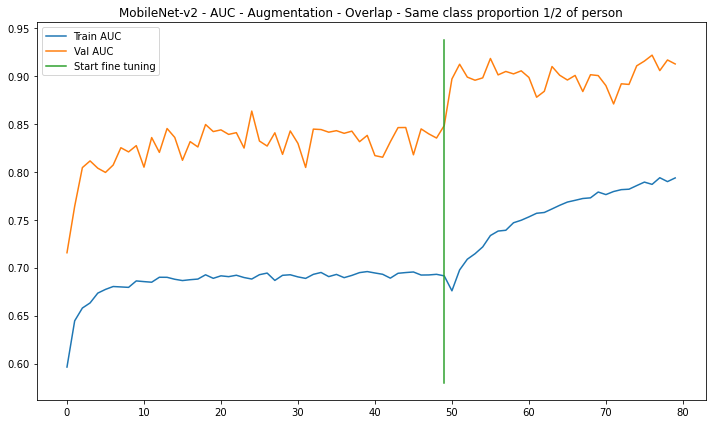

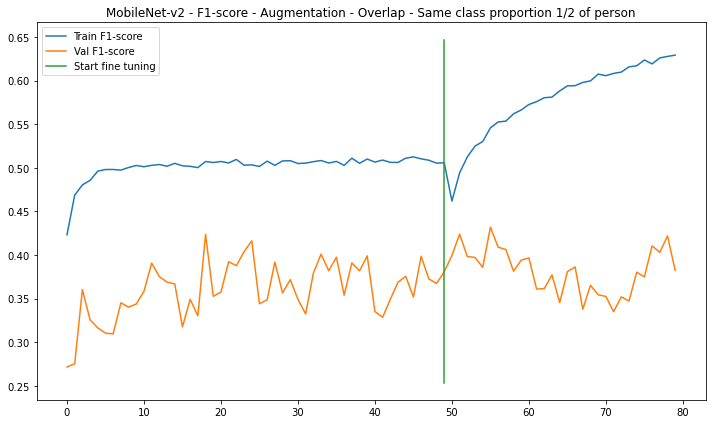

In [14]:
augmentation_mode = AugmentationMode.AugmentationOverlapSameProportion

for fraction in [4, 3, 2]:

    place_per_label, objects_per_label = sort_objects_to_balance(train_classes_counts, train_segmentations, fraction)

    experiment_name_file = f'augmentation_overlap_proportions_{fraction}'
    experiment_name_title = f'Augmentation - Overlap - Same class proportion 1/{fraction} of person'
    model_file = experiment_name_file

    histogram_path = os.path.join(results_path, f'{experiment_name_file}_fine_tune_class_histogram.png')

    train_generator = TrainBalancedImageGenerator(batch_size, images_path, annotations_path, train_names, 
        image_size, place_per_label, objects_per_label, augmentation_mode, histogram_path, total_epochs, seed)

    run_experiment_fine_tune(mobile_name, results_mobile_path, models_mobile_path, 
        train_generator, (experiment_name_file, experiment_name_title), model_file)

    print(f'Finished experiment balancing up to 1/{fraction} of person objects')

#### MobileNetv2 - Augmentation with overlap applying random rotations and keeping the same class proportion

Average placed during 80 epochs: 3.0006
Average class objects during 80 epochs: [1035.8125 1053.175  1053.325  1051.5875 1053.125  1001.9    1282.2625
 1052.7625 1127.825  1051.2875 1029.875  1053.2875 1052.8    1047.9625
 4206.15   1053.025  1044.325  1053.2375 1037.3875 1051.8625]
Finished experiment balancing up to 1/4 of person objects
Average placed during 80 epochs: 4.6396
Average class objects during 80 epochs: [1404.6    1404.3625 1404.0375 1404.575  1403.275  1404.65   1402.2125
 1404.4125 1402.8375 1404.7375 1404.6125 1404.2    1404.2125 1404.2875
 4208.35   1404.075  1404.525  1404.275  1404.4125 1404.3375]
Finished experiment balancing up to 1/3 of person objects
Average placed during 80 epochs: 7.9971
Average class objects during 80 epochs: [2107.375  2107.15   2106.95   2107.35   2106.7625 2107.6125 2105.875
 2107.35   2105.2125 2107.475  2107.5125 2107.0875 2107.1625 2107.6
 4206.8    2106.95   2107.6125 2107.25   2107.5625 2107.525 ]
Finished experiment balancing up to 

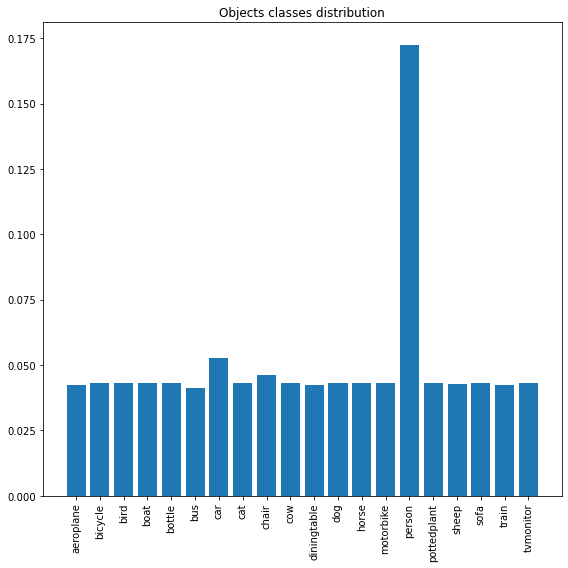

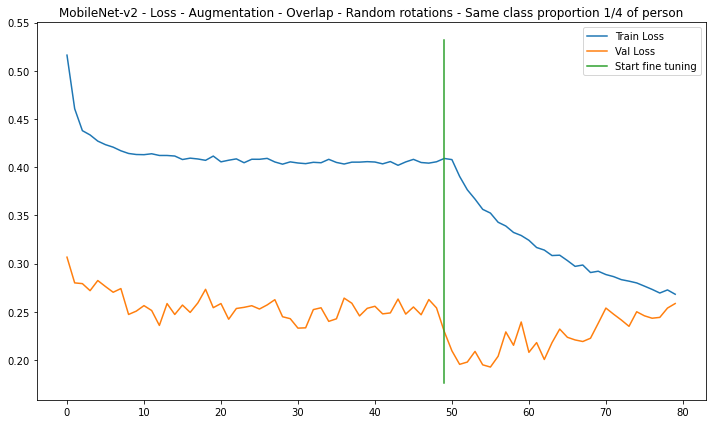

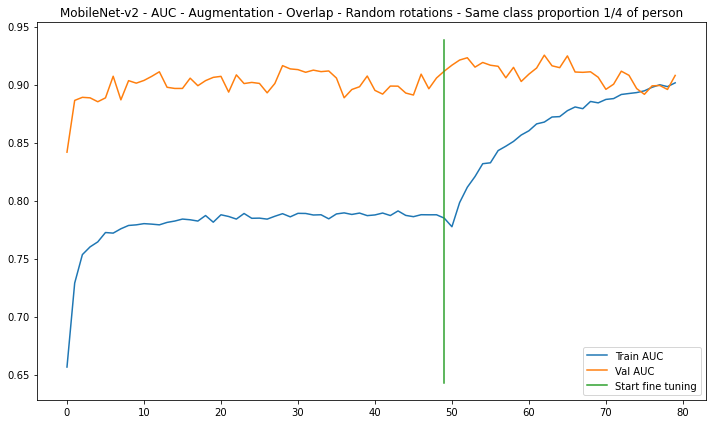

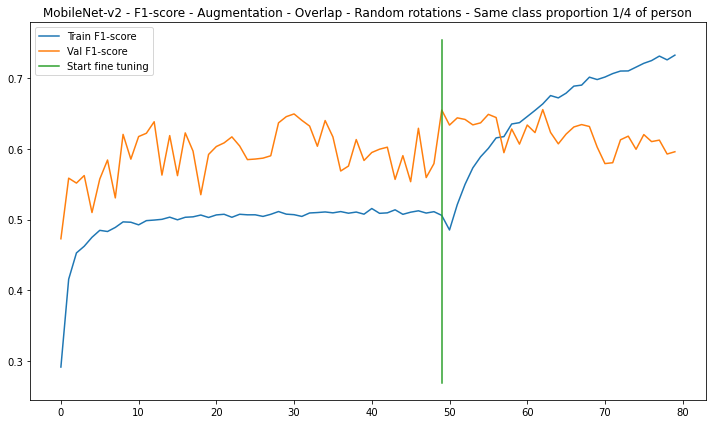

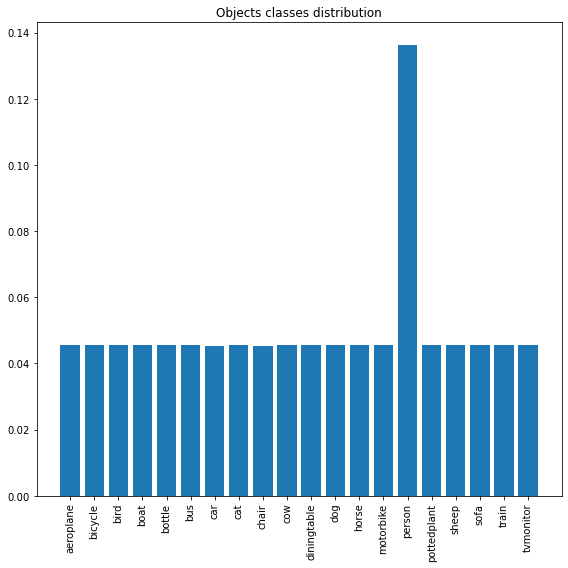

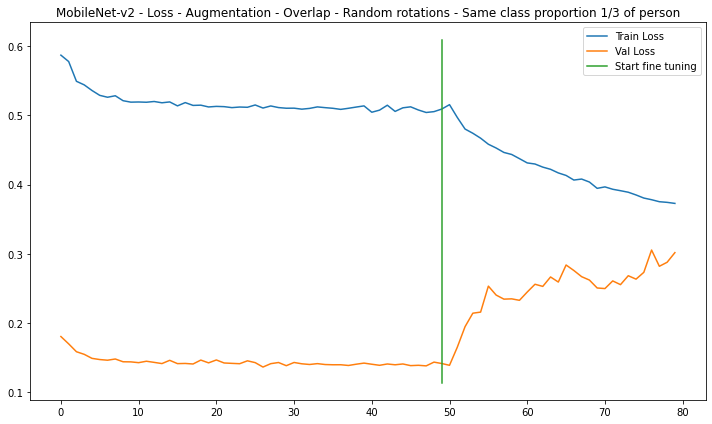

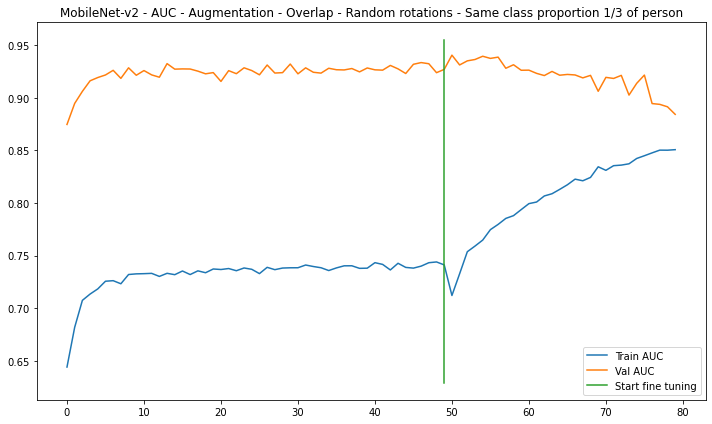

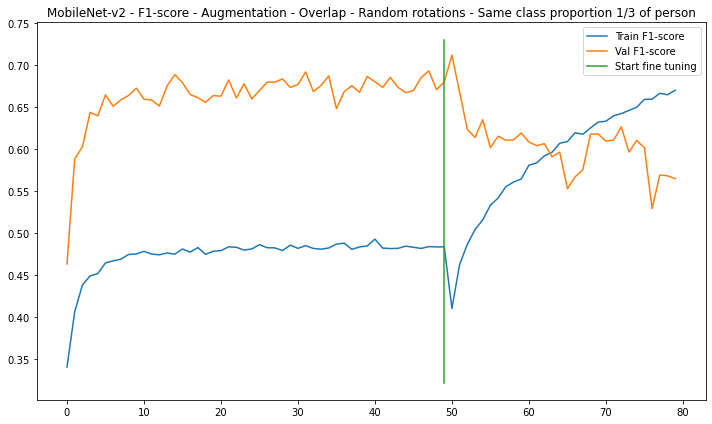

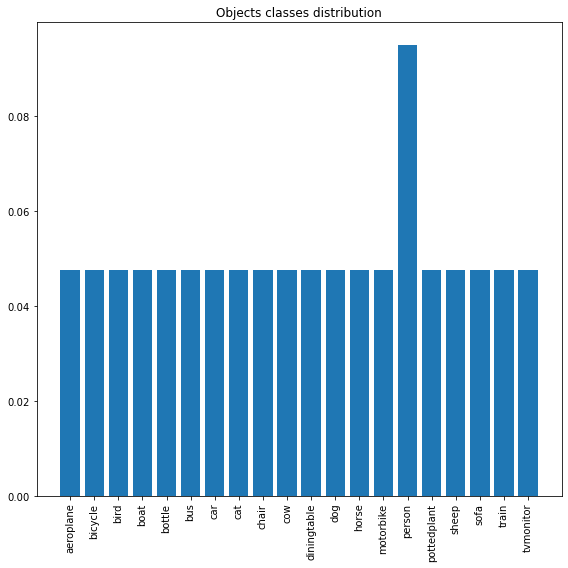

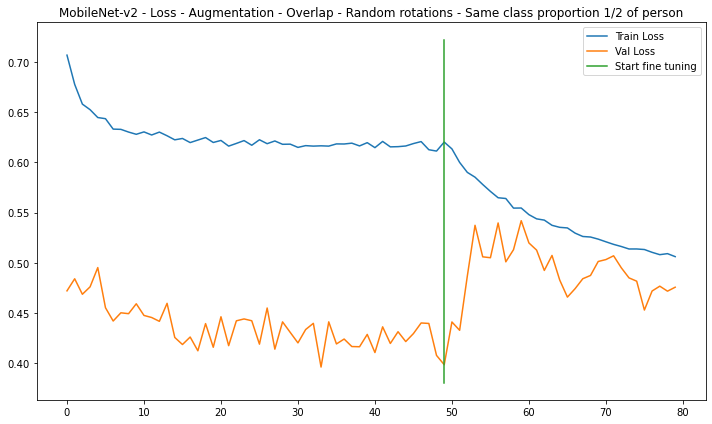

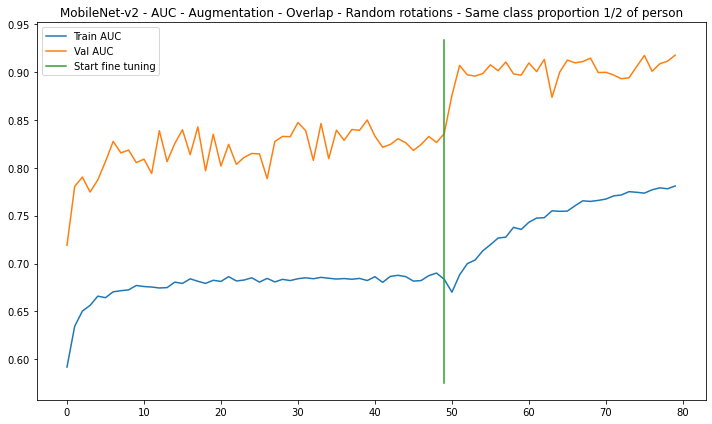

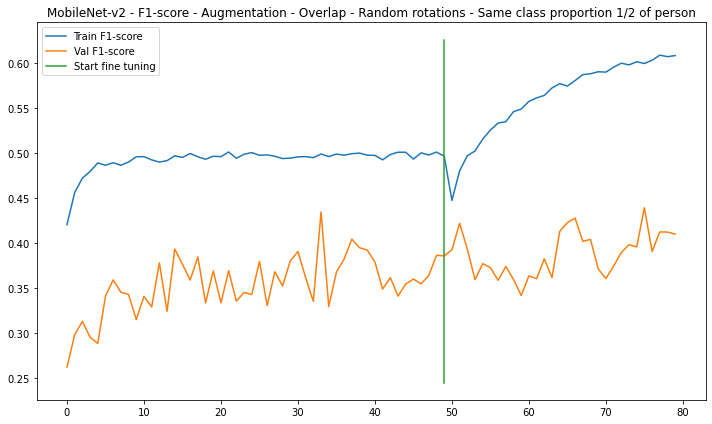

In [12]:
augmentation_mode = AugmentationMode.AugmentationOverlapRotateSameProportion

for fraction in [4, 3, 2]:

    place_per_label, objects_per_label = sort_objects_to_balance(train_classes_counts, train_segmentations, fraction)

    experiment_name_file = f'augmentation_overlap_rotate_proportions_{fraction}'
    experiment_name_title = f'Augmentation - Overlap - Random rotations - Same class proportion 1/{fraction} of person'
    model_file = experiment_name_file

    histogram_path = os.path.join(results_path, f'{experiment_name_file}_fine_tune_class_histogram.png')

    train_generator = TrainBalancedImageGenerator(batch_size, images_path, annotations_path, train_names, 
        image_size, place_per_label, objects_per_label, augmentation_mode, histogram_path, total_epochs, seed)

    run_experiment_fine_tune(mobile_name, results_mobile_path, models_mobile_path, 
        train_generator, (experiment_name_file, experiment_name_title), model_file)

    print(f'Finished experiment balancing up to 1/{fraction} of person objects')

#### MobileNetv2 - Augmentation with overlap applying random scaling and keeping the same class proportion

Average placed during 80 epochs: 3.0006
Average class objects during 80 epochs: [1034.5    1053.4625 1052.7625 1051.9    1052.9375 1002.1125 1282.1875
 1053.25   1127.7125 1051.2875 1028.2375 1053.075  1052.9125 1048.55
 4206.85   1052.175  1045.9875 1053.2875 1037.675  1051.4   ]
Finished experiment balancing up to 1/4 of person objects
Average placed during 80 epochs: 4.6396
Average class objects during 80 epochs: [1404.425  1404.1625 1403.975  1404.3625 1403.3375 1404.475  1401.9625
 1404.45   1402.775  1404.0875 1404.525  1404.325  1404.375  1404.2875
 4207.9625 1404.275  1404.0625 1404.4125 1404.5625 1404.3875]
Finished experiment balancing up to 1/3 of person objects
Average placed during 80 epochs: 7.9971
Average class objects during 80 epochs: [2107.4375 2106.975  2106.9375 2107.275  2106.6625 2107.55   2105.35
 2107.45   2105.4125 2107.2375 2107.4125 2106.9375 2107.3875 2107.7625
 4206.8    2107.075  2107.5125 2107.4375 2107.4    2107.2875]
Finished experiment balancing up to 

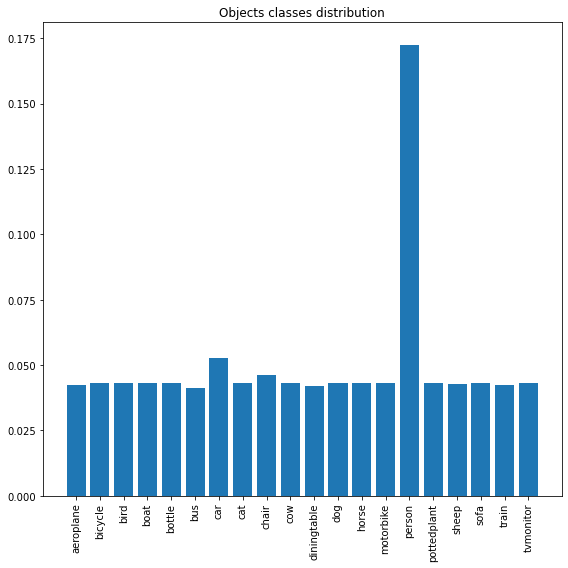

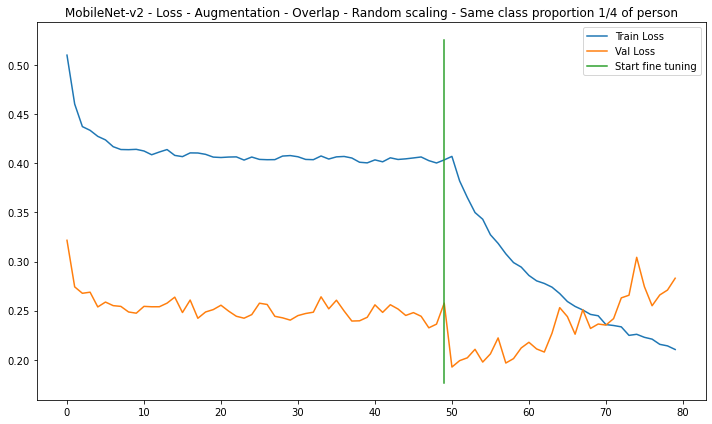

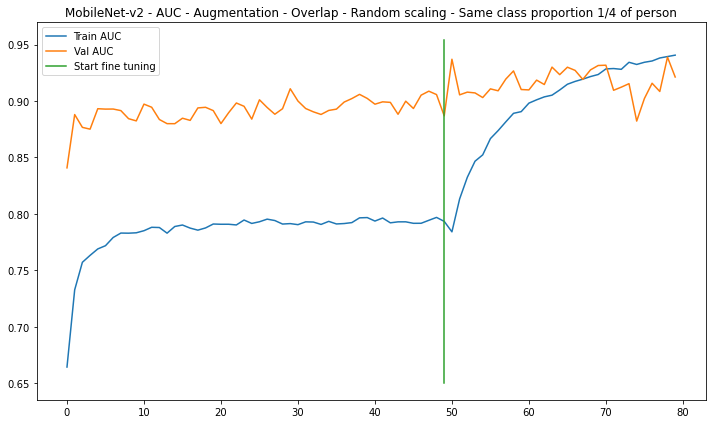

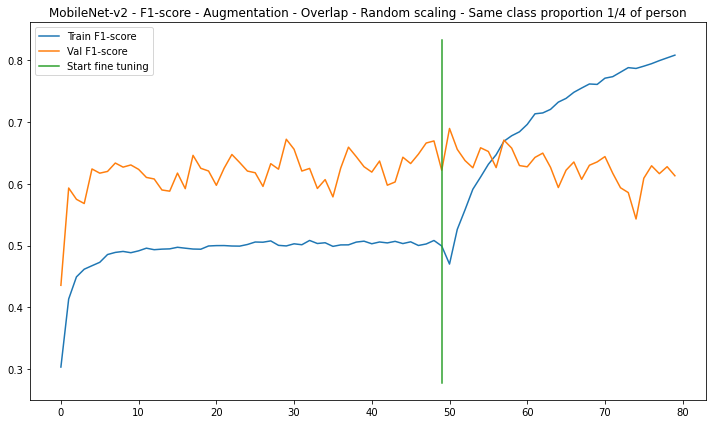

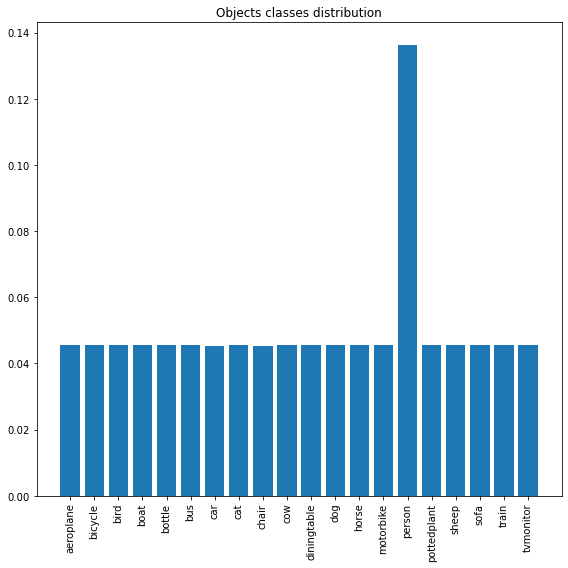

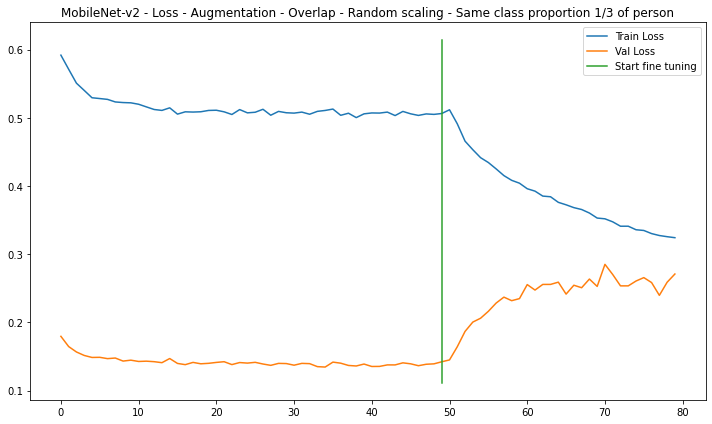

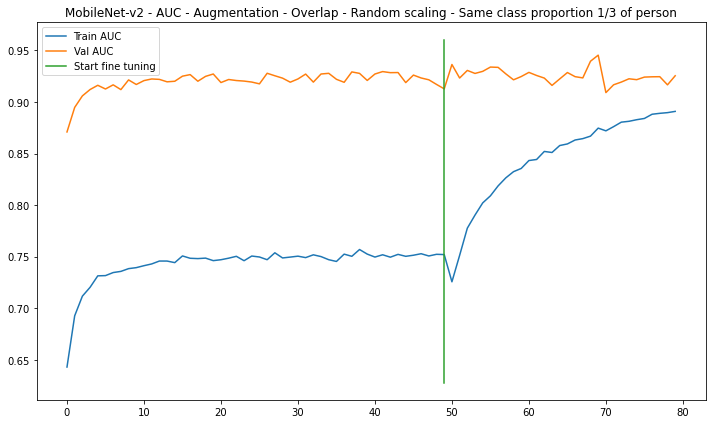

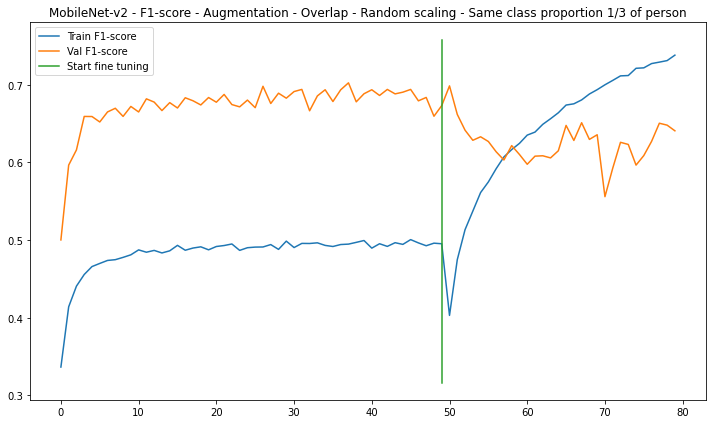

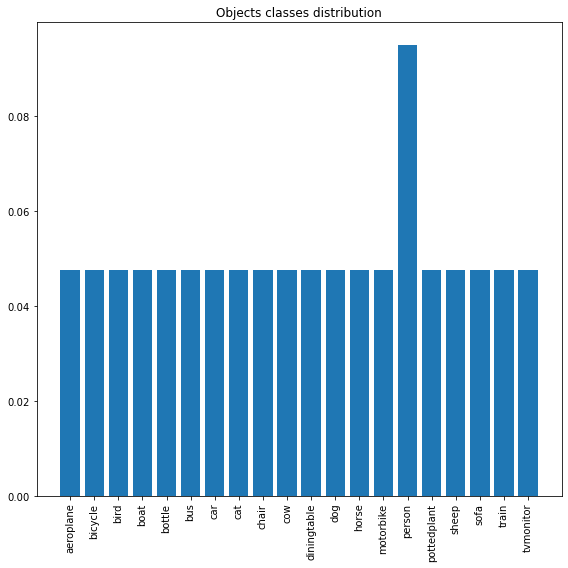

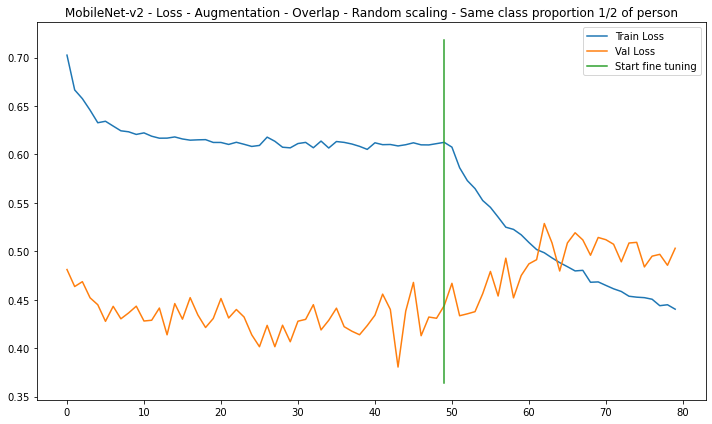

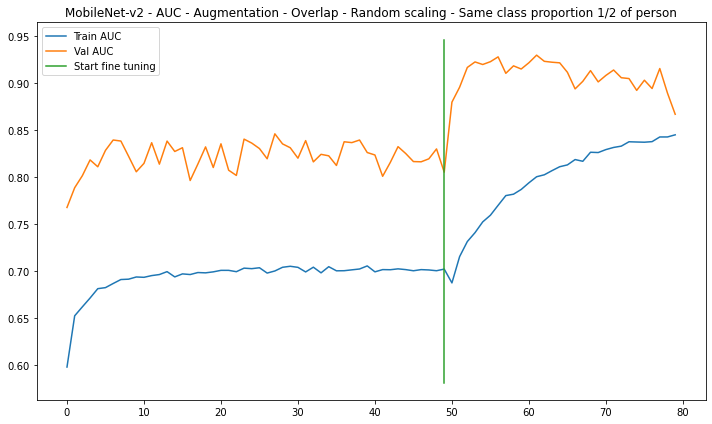

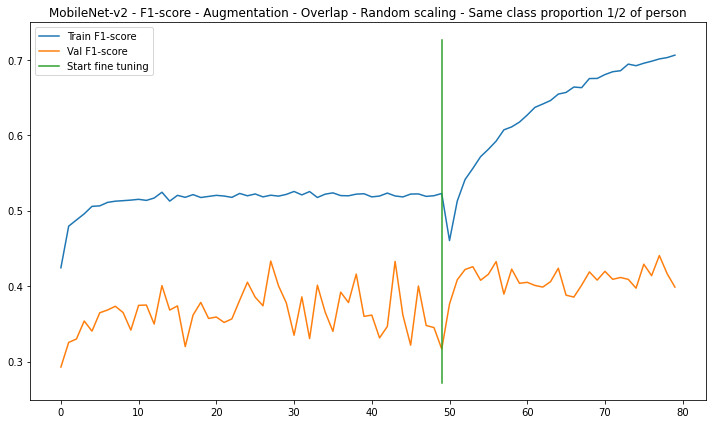

In [13]:
augmentation_mode = AugmentationMode.AugmentationOverlapScaleSameProportion

for fraction in [4, 3, 2]:

    place_per_label, objects_per_label = sort_objects_to_balance(train_classes_counts, train_segmentations, fraction)

    experiment_name_file = f'augmentation_overlap_scale_proportions_{fraction}'
    experiment_name_title = f'Augmentation - Overlap - Random scaling - Same class proportion 1/{fraction} of person'
    model_file = experiment_name_file

    histogram_path = os.path.join(results_path, f'{experiment_name_file}_fine_tune_class_histogram.png')

    train_generator = TrainBalancedImageGenerator(batch_size, images_path, annotations_path, train_names, 
        image_size, place_per_label, objects_per_label, augmentation_mode, histogram_path, total_epochs, seed)

    run_experiment_fine_tune(mobile_name, results_mobile_path, models_mobile_path, 
        train_generator, (experiment_name_file, experiment_name_title), model_file)

    print(f'Finished experiment balancing up to 1/{fraction} of person objects')

#### MobileNetv2 - Augmentation with overlap applying random transformations and keeping the same class proportion

Average placed during 80 epochs: 3.0006
Average class objects during 80 epochs: [1039.0625 1052.8    1053.2    1051.675  1052.7625 1000.25   1282.2875
 1053.2    1127.5    1051.45   1027.5125 1053.125  1053.2375 1051.2125
 4206.875  1052.475  1044.925  1053.05   1035.3875 1050.4625]
Finished experiment balancing up to 1/4 of person objects
Average placed during 80 epochs: 4.6396
Average class objects during 80 epochs: [1404.3875 1404.3    1404.15   1404.3    1403.8875 1404.625  1402.1375
 1404.3125 1402.3875 1404.5    1404.575  1404.2125 1404.35   1404.7
 4208.2    1403.4875 1404.475  1404.375  1404.525  1404.45  ]
Finished experiment balancing up to 1/3 of person objects
Average placed during 80 epochs: 7.9971
Average class objects during 80 epochs: [2107.425  2107.425  2106.9    2107.425  2107.0125 2107.5625 2105.8625
 2107.3625 2105.6875 2107.2    2107.55   2107.1375 2107.075  2107.125
 4207.95   2106.9125 2107.25   2107.3125 2107.475  2107.325 ]
Finished experiment balancing up to 

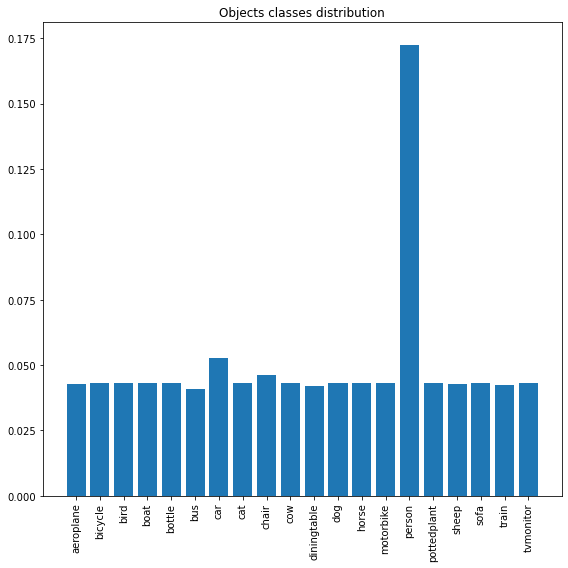

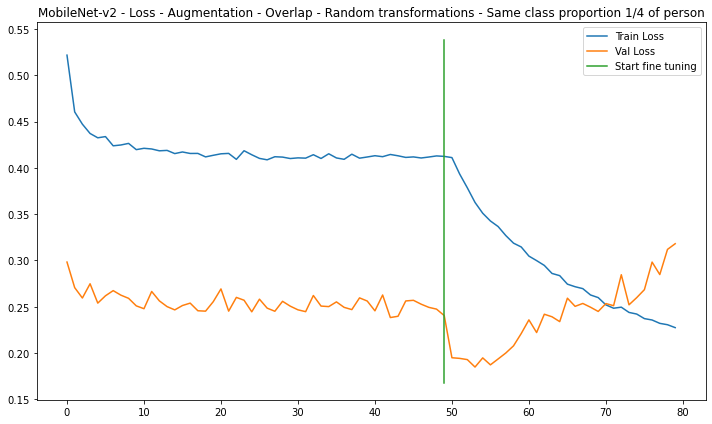

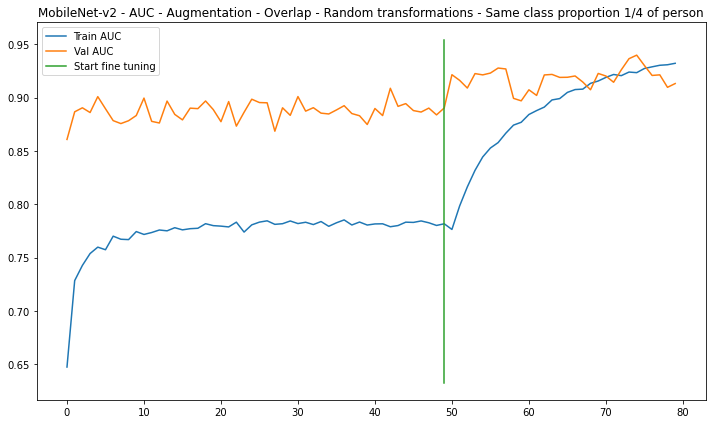

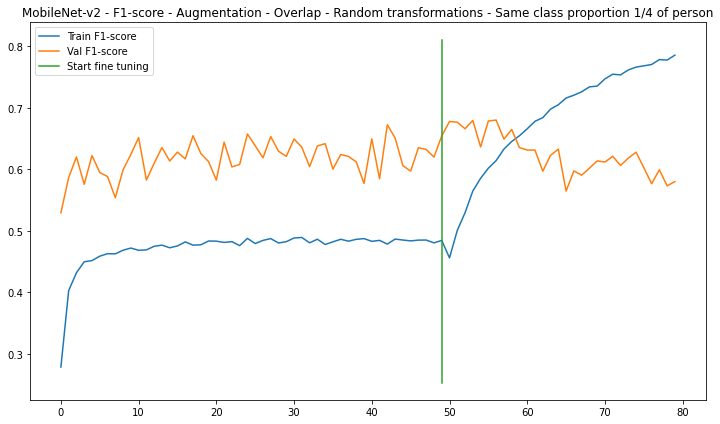

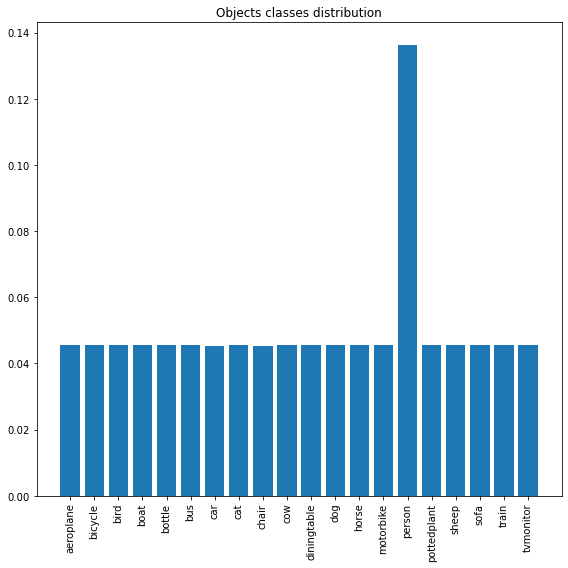

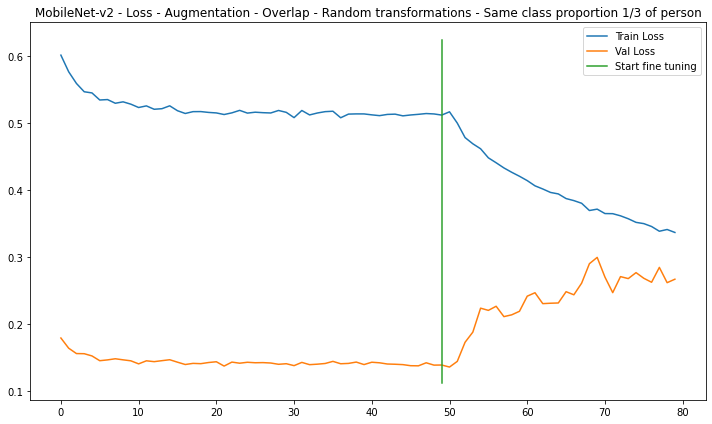

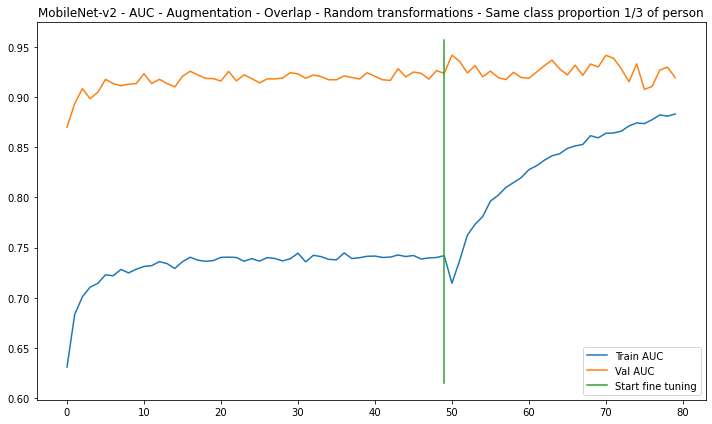

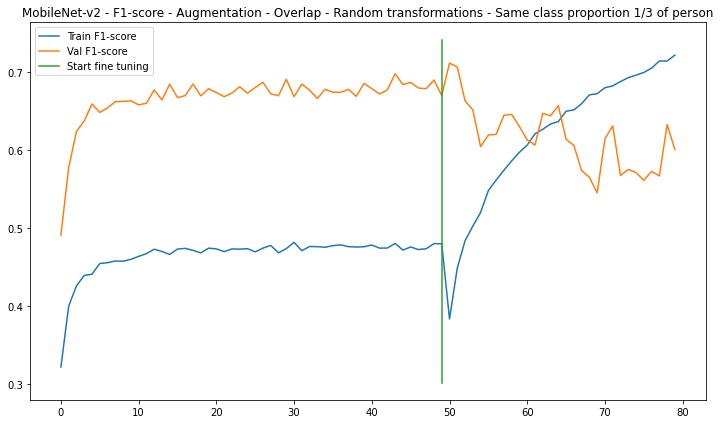

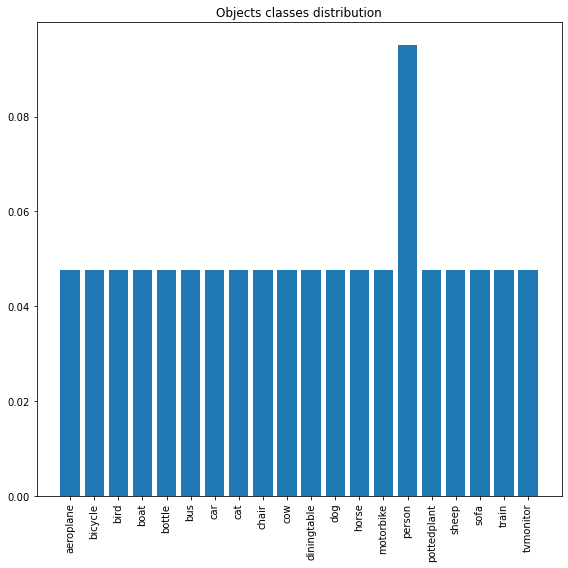

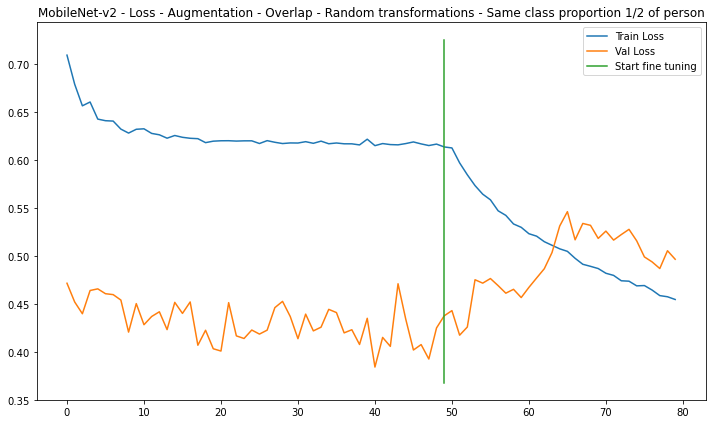

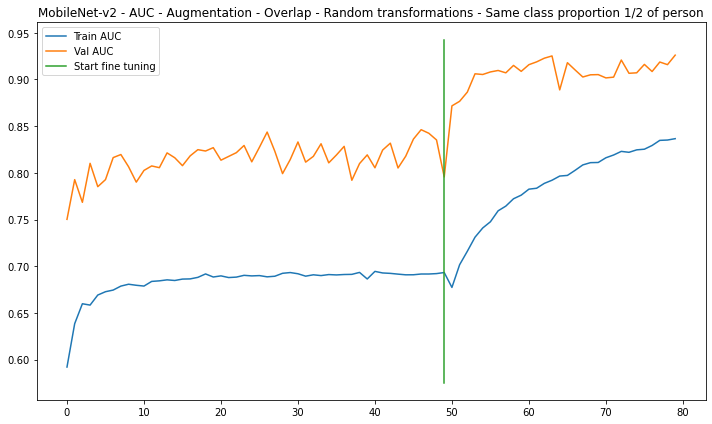

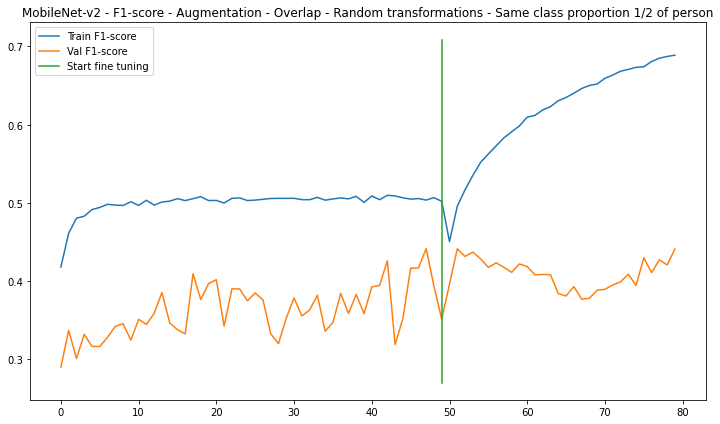

In [14]:
augmentation_mode = AugmentationMode.AugmentationOverlapTransformSameProportion

for fraction in [4, 3, 2]:

    place_per_label, objects_per_label = sort_objects_to_balance(train_classes_counts, train_segmentations, fraction)

    experiment_name_file = f'augmentation_overlap_transform_proportions_{fraction}'
    experiment_name_title = f'Augmentation - Overlap - Random transformations - Same class proportion 1/{fraction} of person'
    model_file = experiment_name_file

    histogram_path = os.path.join(results_path, f'{experiment_name_file}_fine_tune_class_histogram.png')

    train_generator = TrainBalancedImageGenerator(batch_size, images_path, annotations_path, train_names, 
        image_size, place_per_label, objects_per_label, augmentation_mode, histogram_path, total_epochs, seed)

    run_experiment_fine_tune(mobile_name, results_mobile_path, models_mobile_path, 
        train_generator, (experiment_name_file, experiment_name_title), model_file)

    print(f'Finished experiment balancing up to 1/{fraction} of person objects')